<a href="https://colab.research.google.com/github/raviatkumar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Seoul Bike Sharing Demand Prediction**

##**Problem Description**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**A small insights from the problem statement and data description**

**The following factors could affect the supply and demand for rental bikes:**

**Weather Condition:**

In warmer climates with moderate sunlight, low humidity, quiet winds, and dry roads, people prefer to ride bike. People may prefer to drive a car than ride a bike if the weather is poor.

**Demand for Rental Bikes:**

People who don't own bike and those who migrate to cities temporarily need a bike and an easy means of transportation. Those who possess their own bike may not choose to rent one.

**Availability of Rental Bikes:**

Bike rental prices and availability at off-peak and rush hour times, as well as on weekdays and weekends.

**Stable Supply of Rental Bike:**

The weather conditions, demand, and supply sides may all have an impact on the stable supply of rental bikes.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import missingno as msno

import datetime as dt
import math 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore") 

**Load the dataset and print the shape of the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction - Ravi Kumar/SeoulBikeData.csv',encoding='latin')  

In [4]:
print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is 8760 rows and 14 columns


##**EDA**

**Print the first and last 3 rows of columns**

In [5]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes

In [6]:
df.tail(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

**Check the column datatypes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


*   From the above dataset infromation, 10 columns are integer types and 4 columns are object types

**Understanding statistical data summaries**

In [8]:
df.describe().transpose() 

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

**Checking for missing values in the dataset**

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64




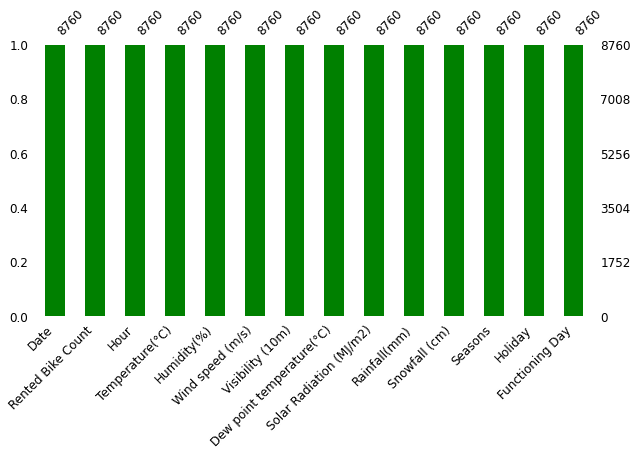

In [9]:
print(df.isnull().sum())
print('\n')
msno.bar(df,color = 'g',figsize=(10,5), fontsize=12)



*   You can receive a quick visual assessment of how complete your dataset is using the customizable and user-friendly missing data visualisations by Missingno.
*   There are no missing values in the dataset, as seen in the plot above.





**Identifying and printing duplicate values**

In [10]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0



*   there were no duplicate values found in the dataset


In [11]:
Hour_min_mean_max=df['Hour'].agg(['min','mean','max'])
print(f'The minimum hour is {Hour_min_mean_max[0]} and mean hour is  {round(Hour_min_mean_max[1],2)} and maximum hour is {Hour_min_mean_max[2]}\n')
Temperature_min_mean_max=df['Temperature(°C)'].agg(['min','mean','max'])
print(f'The minimum Temperature is {Temperature_min_mean_max[0]}C and mean temperatur is {round(Temperature_min_mean_max[1],2)}C and maximum Temperature is {Temperature_min_mean_max[2]}C\n')
Humidity_min_mean_max_per=df['Humidity(%)'].agg(['min','mean','max'])
print(f'The minimum Humidity is {Humidity_min_mean_max_per[0]}% and mean humidity is {round(Humidity_min_mean_max_per[1],2)}% and maximum Humidity is {Humidity_min_mean_max_per[2]}%\n')
wind_speed_min_mean_max=df['Wind speed (m/s)'].agg(['min','mean','max'])
print(f'The minimum Wind speed is {wind_speed_min_mean_max[0]}m/s and mean Wind speed is {round(wind_speed_min_mean_max[1],2)}m/s and maximum Wind speed is {wind_speed_min_mean_max[2]}m/s\n')
visibility_min_mean_max=df['Visibility (10m)'].agg(['min','mean','max'])
print(f'The minimum Visibility is {visibility_min_mean_max[0]}m and mean Visibility is {round(visibility_min_mean_max[1],2)}m and maximum Visibility is {visibility_min_mean_max[2]}m\n')
Dew_point_temperature_min_mean_max=df['Dew point temperature(°C)'].agg(['min','mean','max'])
print(f'The minimum Dew point temperature is {Dew_point_temperature_min_mean_max[0]}C and mean Dew point temperature is {round(Dew_point_temperature_min_mean_max[1],2)}C and maximum Dew point temperature is {Dew_point_temperature_min_mean_max[2]}C\n')
Solar_Radiation_min_mean_max=df['Solar Radiation (MJ/m2)'].agg(['min','mean','max'])
print(f'The minimum Solar Radiation is {Solar_Radiation_min_mean_max[0]}(MJ/m2) and mean Solar Radiation is {round(Solar_Radiation_min_mean_max[1],2)}(MJ/m2) and maximum Solar Radiation is {Solar_Radiation_min_mean_max[2]}(MJ/m2)\n')
Rainfall_min_mean_max=df['Rainfall(mm)'].agg(['min','mean','max'])
print(f'The minimum Rainfall is {Rainfall_min_mean_max[0]}(mm) and mean Rainfall is {round(Rainfall_min_mean_max[1],2)}(mm) and maximum Rainfall is {Rainfall_min_mean_max[2]}(mm)\n')
Snowfall_min_mean_max=df['Snowfall (cm)'].agg(['min','mean','max'])
print(f'The minimum Snowfall is {Snowfall_min_mean_max[0]}(cm) and mean Snowfall is {round(Snowfall_min_mean_max[1],2)}(cm) and maximum Snowfall is {Snowfall_min_mean_max[2]}(cm)\n')
Rental_bike_min_mean_max=df['Rented Bike Count'].agg(['min','mean','max'])
print(f'The minimum Rented Bike Count is {Rental_bike_min_mean_max[0]} and mean Rented Bike count {round(Rental_bike_min_mean_max[1],2)} and maximum Rented Bike Count is {Rental_bike_min_mean_max[2]}\n')


The minimum hour is 0.0 and mean hour is  11.5 and maximum hour is 23.0

The minimum Temperature is -17.8C and mean temperatur is 12.88C and maximum Temperature is 39.4C

The minimum Humidity is 0.0% and mean humidity is 58.23% and maximum Humidity is 98.0%

The minimum Wind speed is 0.0m/s and mean Wind speed is 1.72m/s and maximum Wind speed is 7.4m/s

The minimum Visibility is 27.0m and mean Visibility is 1436.83m and maximum Visibility is 2000.0m

The minimum Dew point temperature is -30.6C and mean Dew point temperature is 4.07C and maximum Dew point temperature is 27.2C

The minimum Solar Radiation is 0.0(MJ/m2) and mean Solar Radiation is 0.57(MJ/m2) and maximum Solar Radiation is 3.52(MJ/m2)

The minimum Rainfall is 0.0(mm) and mean Rainfall is 0.15(mm) and maximum Rainfall is 35.0(mm)

The minimum Snowfall is 0.0(cm) and mean Snowfall is 0.08(cm) and maximum Snowfall is 8.8(cm)

The minimum Rented Bike Count is 0.0 and mean Rented Bike count 704.6 and maximum Rented Bike Count

In [12]:
Maximum_bike_rentals=df.loc[(df['Rented Bike Count'] == 3556.0)]
Maximum_bike_rentals

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4818  19/06/2018               3556    18             24.1           57   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4818               2.9              1301                       15.0   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4818                     0.56           0.0            0.0  Summer   

         Holiday Functioning Day  
4818  No Holiday             Yes

**We can infer from the foregoing that individuals rented the most bikes:**
*   if the hour, temperature, dew point temperature, and visibility were all above average

*   if the humidity, solar radiation, and wind speed were above minimum and close to mean

*   if there was little to no snow or rain in the summer seasons, the day was productive, and there were no holidays.

Therefore, when there is moderate sunlight, low humidity, calm winds, and dry roads, people choose to hire and ride bike. When the weather is nice, there will be a high demand and supply on both sides.

#We can split the dataset into three categories

**Date and Time Variable**

**Numerical Variables**

**Categorical Variables**


#**Date and Time Variable**

In [13]:
#Difference between the start and finish dates
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
Start_date=df['Date'].min()
End_date=df['Date'].max()
print("The dataset's overall number of days is",End_date-Start_date)

The dataset's overall number of days is 364 days 00:00:00


In [14]:
#Splitting the date column into day,month,year,weekends
df['year'] = df['Date'].apply(lambda x : x.year)
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [15]:
date_column=['year','month','weekdays_weekend'] 
df[date_column].head()

year  month  weekdays_weekend
0  2017     12                 0
1  2017     12                 0
2  2017     12                 0
3  2017     12                 0
4  2017     12                 0

In [16]:
df[date_column].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              8760 non-null   int64
 1   month             8760 non-null   int64
 2   weekdays_weekend  8760 non-null   int64
dtypes: int64(3)
memory usage: 205.4 KB


*   The date column has been changed to a numeric format. We divided the date column into the year, day of week, month, weekdays and weekends

**Distribution of date vaiable**

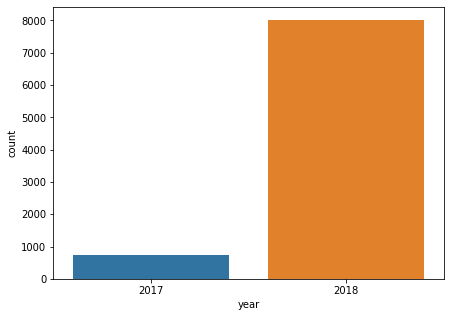

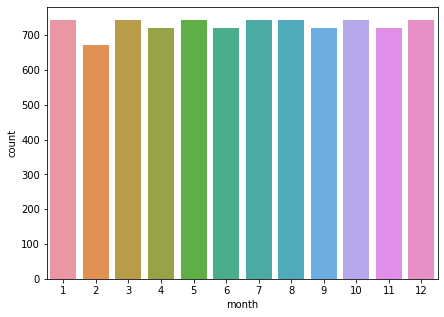

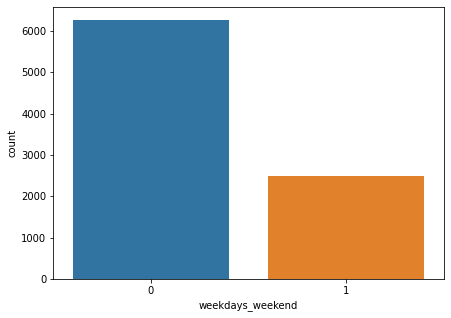

In [17]:
#Let's countplot the date variable for each column.
for col in date_column:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[col])
  plt.xlabel(col) #doubt
plt.show()

**Date and Time variable versus dependent variable distribution**

Text(0, 0.5, 'Rented Bike Count')

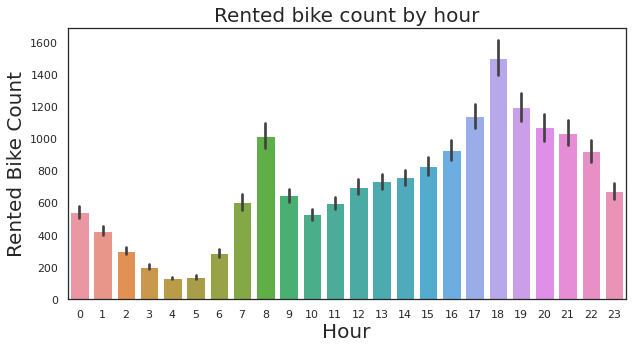

In [18]:
#distribution plot Hour vs Rented Bike Count
plt.figure(figsize=(10,5))
sns.set(style='white')
ax=sns.barplot(x='Hour', y='Rented Bike Count',data=df) 
ax.set_title('Rented bike count by hour',fontsize=20)
ax.set_xlabel("Hour",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   Barplot is being used to count hourly rented bikes.
*   From the plot up above, it is clear, Between 8:00 a.m. and 9:00 p.m., people prefer to ride bikes, which increases demand for bike rentals.



Text(0, 0.5, 'Rented Bike Count')

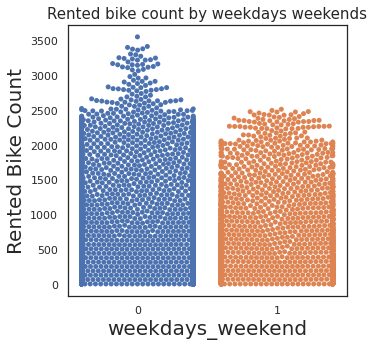

In [19]:
#distribution plot weekdays_weekend vs Rented Bike Count
plt.figure(figsize=(5,5))
sns.set(style='white')
ax=sns.swarmplot(x='weekdays_weekend', y='Rented Bike Count',data=df) 
ax.set_title('Rented bike count by weekdays weekends',fontsize=15)
ax.set_xlabel("weekdays_weekend",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   Swarmplot is being used to plot weekdays_weekend rented bikes.

*   From the plot above it is clear, weekdays rented more bikes than weekends.

Text(0, 0.5, 'Rented Bike Count')

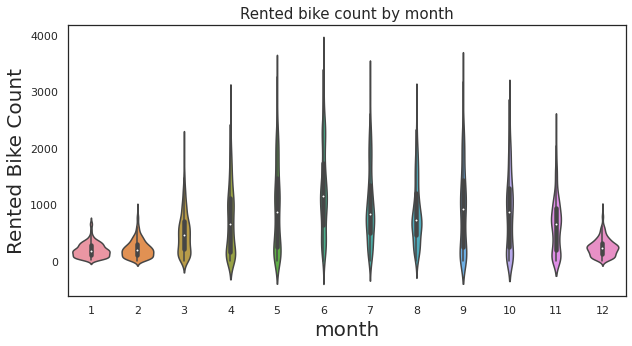

In [20]:
#distribution plot month vs Rented Bike Count
plt.figure(figsize=(10,5))
sns.set(style='white')
ax=sns.violinplot(x='month', y='Rented Bike Count',data=df)
ax.set_title('Rented bike count by month',fontsize=15)
ax.set_xlabel("month",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   Violinplot is being used to plot monthly rented bikes.
*   From the plot above it is clear, In the sixth month, people rented more bikes and took a ride



Text(0, 0.5, 'Rented Bike Count')

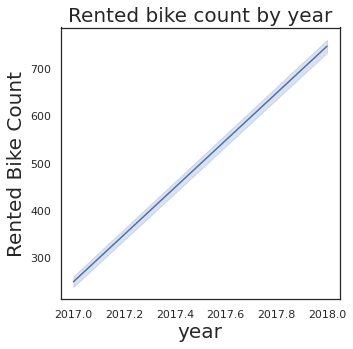

In [21]:
#distribution plot year vs Rented Bike Count
plt.figure(figsize=(5,5))
sns.set(style='white')
ax=sns.lineplot(x='year', y='Rented Bike Count',data=df) 
ax.set_title('Rented bike count by year',fontsize=20)
ax.set_xlabel("year",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   Lineplot is being used to plot year  rented bikes.
*   From the plot above it is clear, The number of bike rentals increased from 2017 to 2018 has the business grows.

In [22]:
df=df.drop(columns=['Date','year','day_of_week'],axis=1)

*   Eliminating the Date, Year, and Day of Week because weekdays_weekends and Months are being taken into consideration




**Correlation Analysis:**

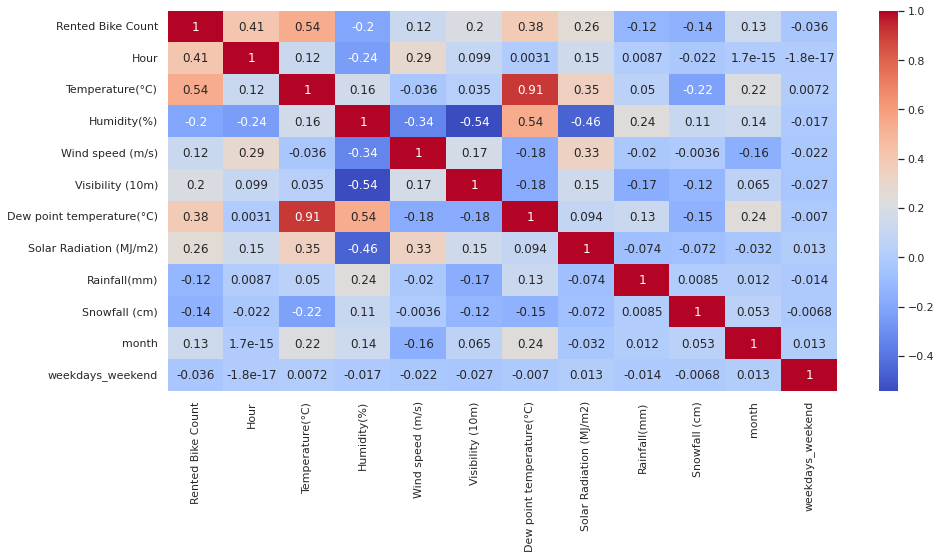

In [23]:
#plot heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,cbar=True)   

In [24]:
df=df.drop(columns=['Dew point temperature(°C)'],axis=1)

In [25]:
# Finding Multicollinearity
def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [26]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0                     Hour  3.960112
1          Temperature(°C)  3.288623
2              Humidity(%)  6.155420
3         Wind speed (m/s)  4.651787
4         Visibility (10m)  5.359009
5  Solar Radiation (MJ/m2)  2.260940
6             Rainfall(mm)  1.080309
7            Snowfall (cm)  1.131108
8                    month  5.009301
9         weekdays_weekend  1.380635

**Correlation**: You can only determine how much two variables are linearly reliant on one another by looking at their correlations.


*   The variables are said to be positively connected if the value is positive.

*   The variables are said to be negatively linked if the value is negative.
*   It is said that there is no correlation between the variables if the value is zero or very near to it.

Dew point temperature and temperature is highly positive correlation, as temperature increases dew point temperature also increases. Hence, we remove this column, our analysis results are unaffected.

#**Analysis of Dependent Variable**

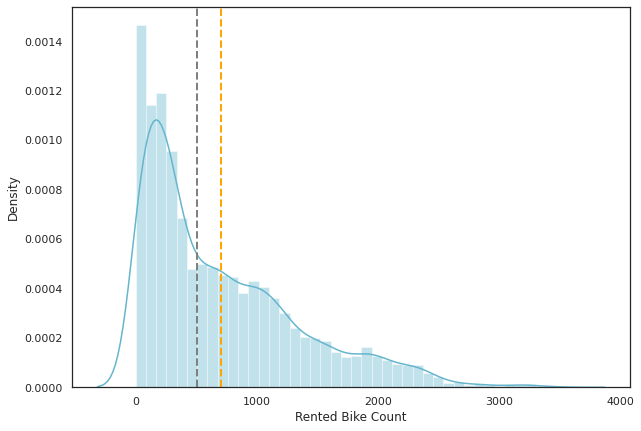

In [27]:
#Rentable bike count distribution plot
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="c")
ax.axvline(df['Rented Bike Count'].mean(), color='orange', linestyle='dashed', linewidth=2)#cancel
ax.axvline(df['Rented Bike Count'].median(), color='gray', linestyle='dashed', linewidth=2)
plt.show()


*   We use distplot to check distribution for the output variables in the dataset and if it is skewed, we should do transformation to make it normal distribution

*   We can determine the direction of the skewness. The tail of a distribution curve has a longer right side when there is a positive skew and if it is left side, it is negatively skewed.
*   We reduce the skewness by square root, cube root, and log transformation


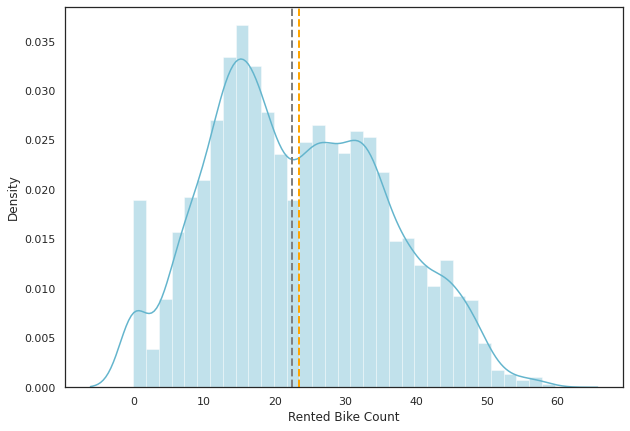

In [28]:
# Applying the sqrt transformation.
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="c")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='orange', linestyle='dashed', linewidth=2)#use 1 and second
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='gray', linestyle='dashed', linewidth=2)
plt.show()

*   By using the sqrt transformation, we normalise the dependent variable.

#Numerical Variables

In [29]:
numerical_var=['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)','Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','month', 'weekdays_weekend','Hour']

In [30]:
df[numerical_var].head()

Temperature(°C)  Wind speed (m/s)  Visibility (10m)  Humidity(%)  \
0             -5.2               2.2              2000           37   
1             -5.5               0.8              2000           38   
2             -6.0               1.0              2000           39   
3             -6.2               0.9              2000           40   
4             -6.0               2.3              2000           36   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0     12   
1                      0.0           0.0            0.0     12   
2                      0.0           0.0            0.0     12   
3                      0.0           0.0            0.0     12   
4                      0.0           0.0            0.0     12   

   weekdays_weekend  Hour  
0                 0     0  
1                 0     1  
2                 0     2  
3                 0     3  
4                 0     4

**Identifying and removing outliers**

In [31]:
detec_outlier_column=df[numerical_var]

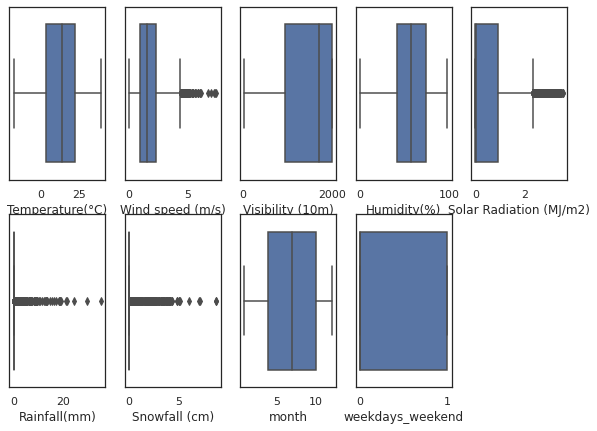

In [32]:
plt.figure(figsize=(10,7))
for index,item in enumerate([x for x in detec_outlier_column if x not in ['Rented Bike Count','Hour']]):
  plt.subplot(2,5,index+1)
  sns.boxplot(df[item])

*   For identifying outliers, scatter plots and box plots are the most used visualisation techniques.Here we use boxplot
*   Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation

In [33]:
outlier_column=['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
print(outlier_column)

['Rainfall(mm)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)']


In [34]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [35]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8599 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8119 non-null   float64
 7   Rainfall(mm)             8232 non-null   float64
 8   Snowfall (cm)            8317 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month                    8760 non-null   int64  
 13  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6),

**Handling Null Values**

Through the removal of outliers, some null values have been added to these four columns. At this point, we have two options: either we can infer meaningful complete values to the observations with null values, or we can remove them. In this instance, I will impute them using the median value of each column.

In [37]:
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].median())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].median())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].median())
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].median())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month                    8760 non-null   int64  
 13  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6),

**Distribution of the numeric Variables**

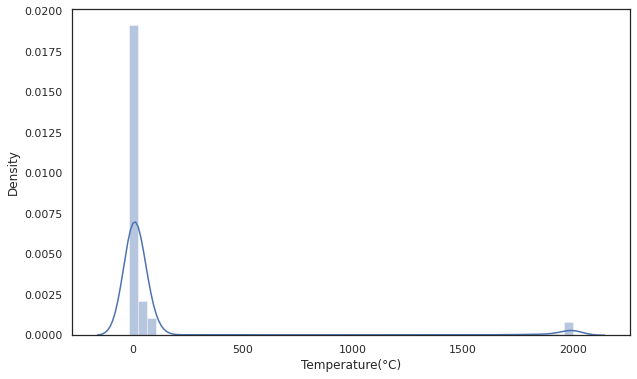

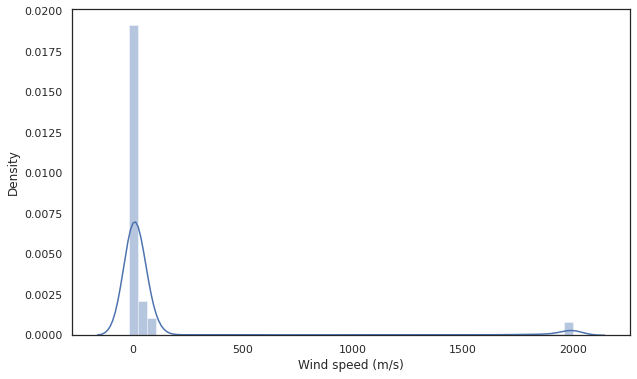

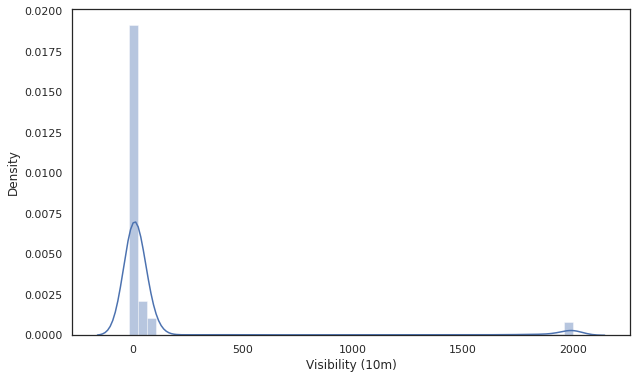

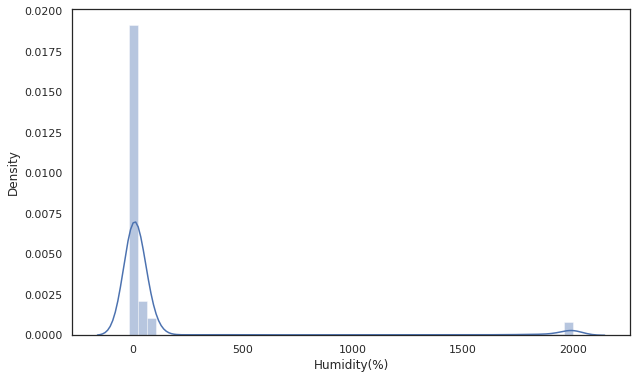

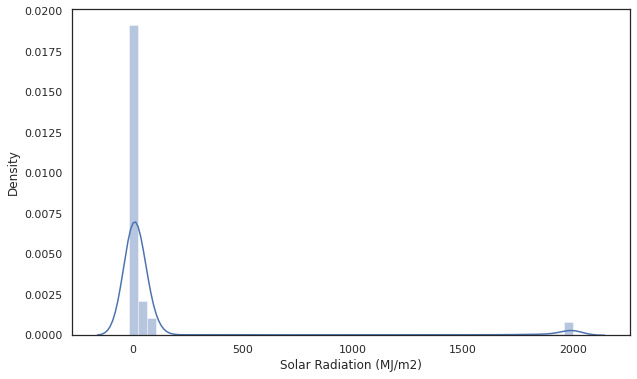

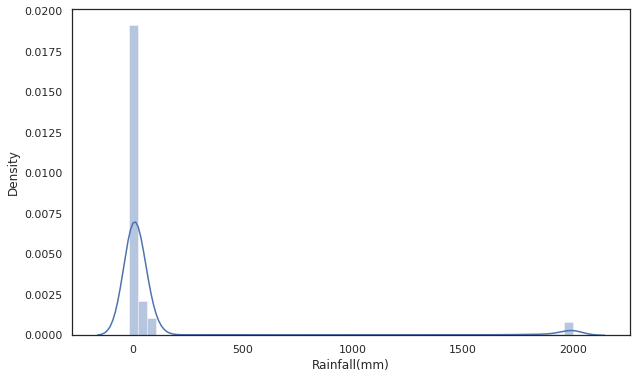

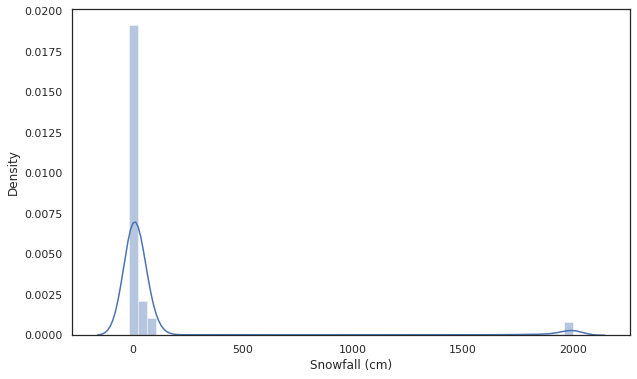

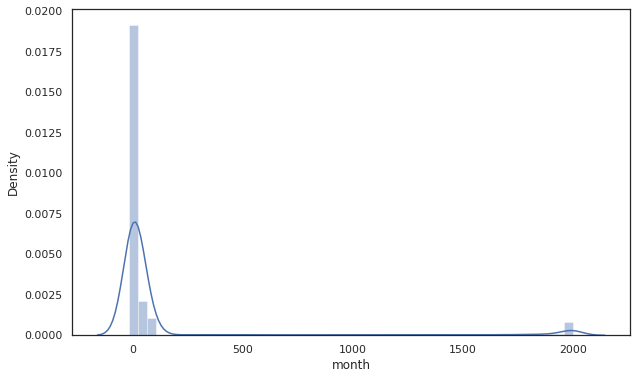

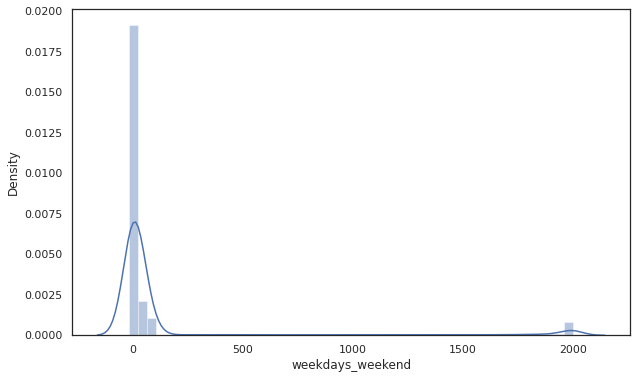

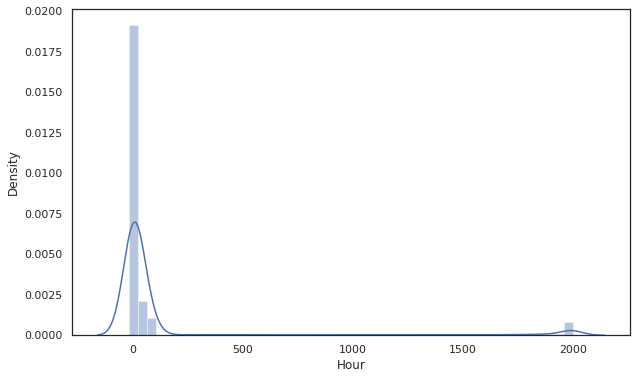

In [39]:
for col in numerical_var:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[numerical_var],kde=True)
  plt.xlabel(col)
plt.show()

**Numerical variable versus Depdendent variable distribution**

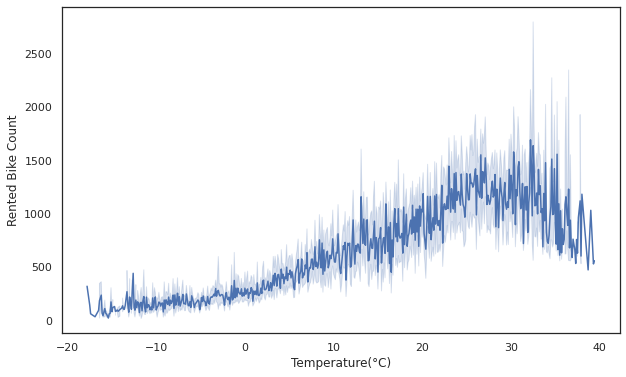

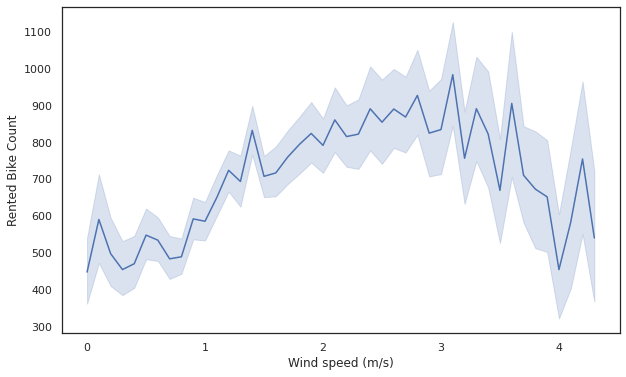

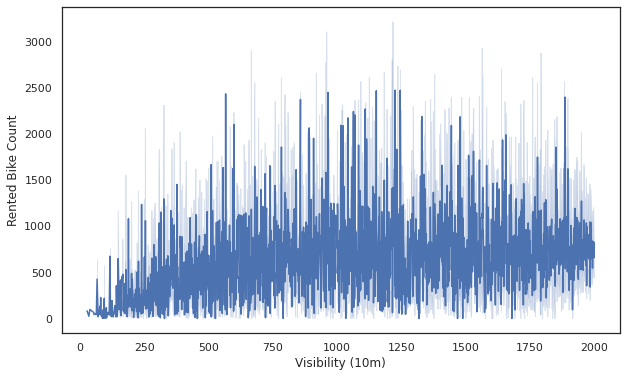

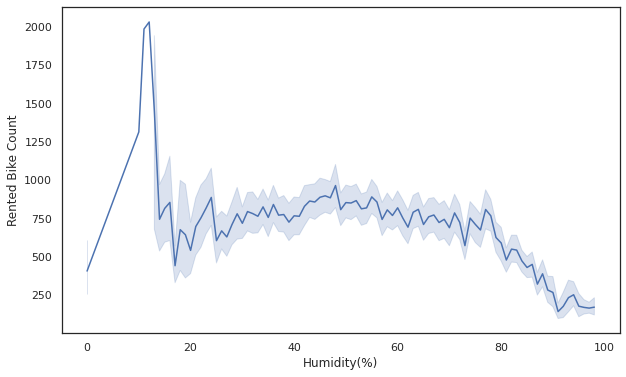

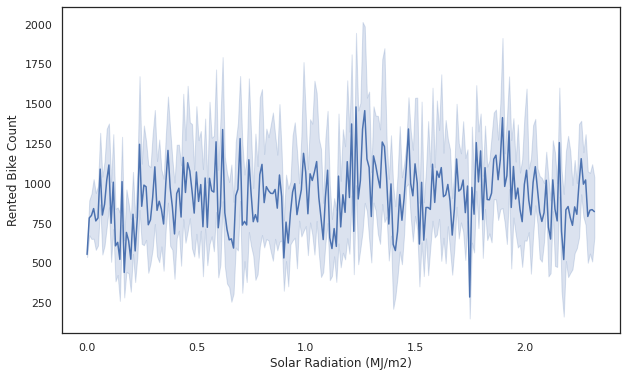

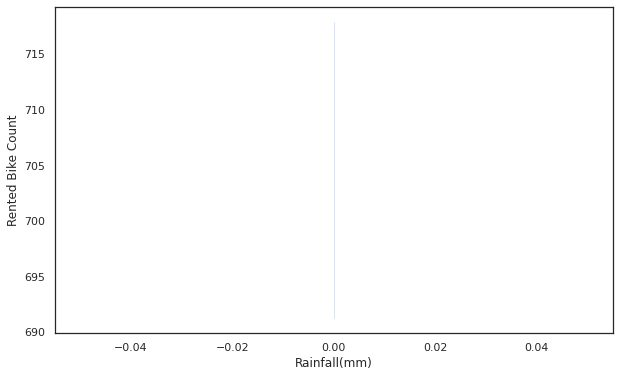

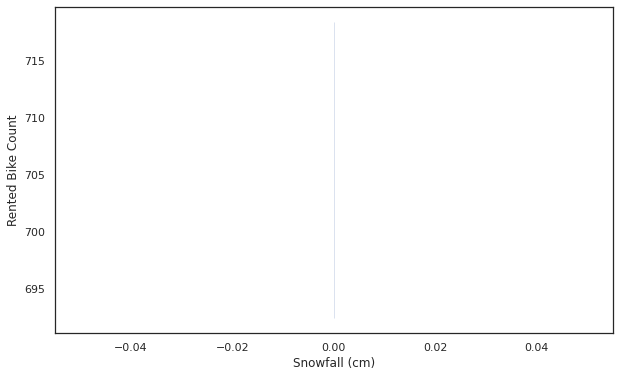

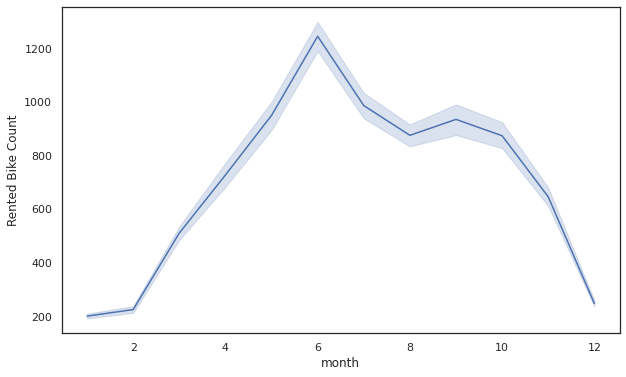

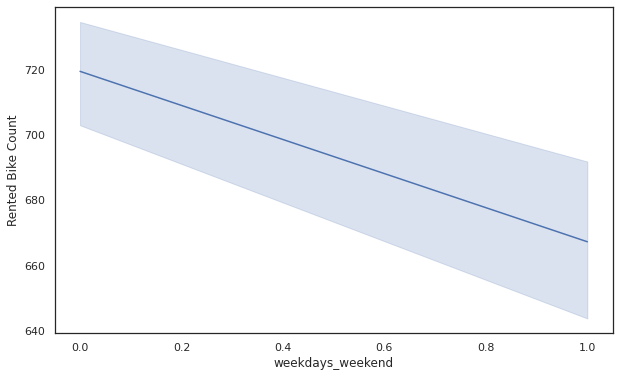

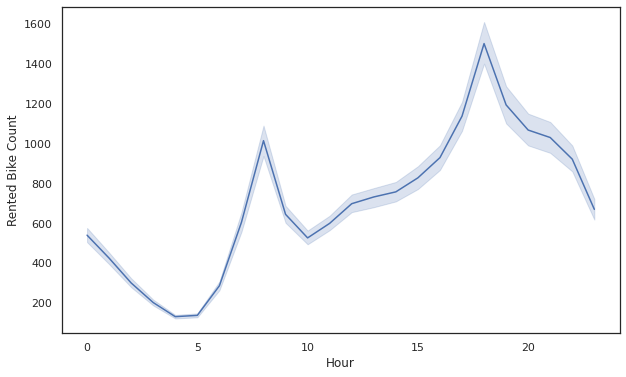

In [40]:
for i in numerical_var:
  plt.figure(figsize=(10,6))
  sns.lineplot(x=i,y='Rented Bike Count',data=df)

**From the plot between the numerical variable and the dependent variable shown above:**

*   People enjoy riding bike in hot weather between 23° and 30°C

*   As the wind speed  increases between 2 and 3 (m/s), people prefer to hire and ride bikes

*   People favour biking in areas with great visibility.

*   People prefer to ride bikes where humidity below 20%
*   When there is solar radiation, there are a lot of leased bikes—the rental counter is approximately 1000
*   People prefer to hire and  ride bikes when there is no rainfall and snowfall

*   In the sixth month, people rented more bikes and took a ride

*   Weekdays are the preferred days for people to hire and ride bike than weekends

**Regression plot**

As the name implies, regression plots provide a regression line between two parameters and aid in seeing their linear relationships. The linear regression model fit and data are plotted using the regplot() function. It first creates a scatterplot of two variables, fits the regression model, and then plots the regression line that results.

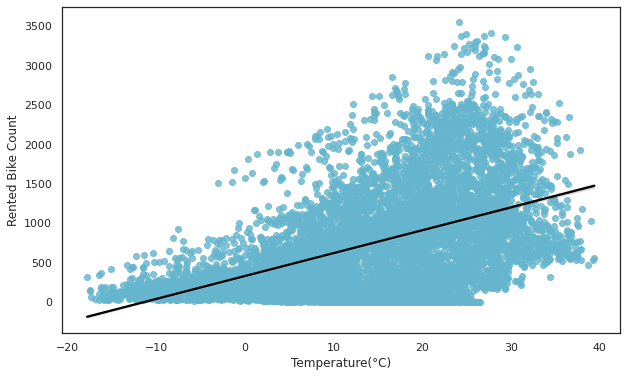

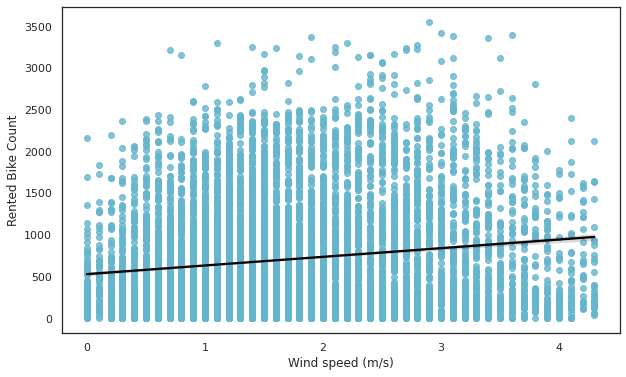

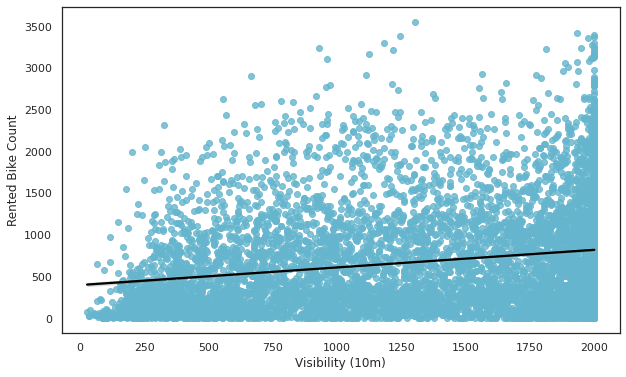

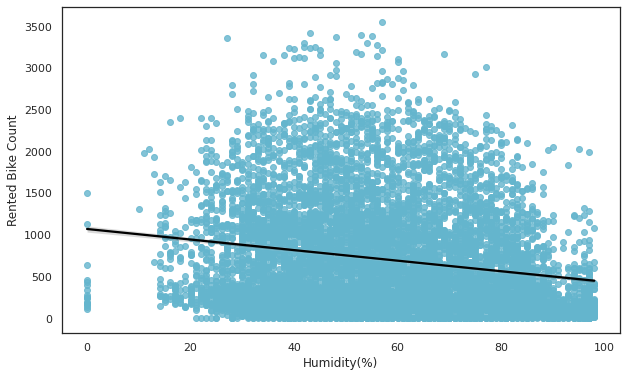

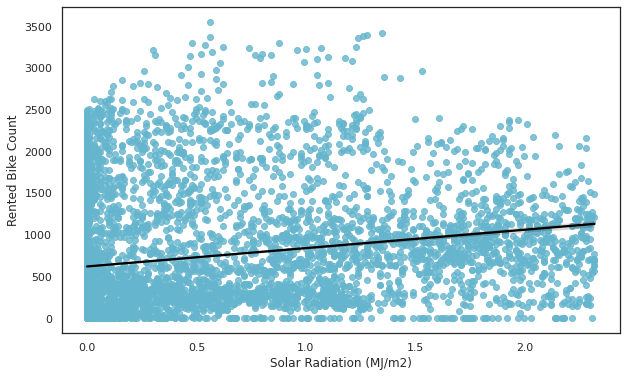

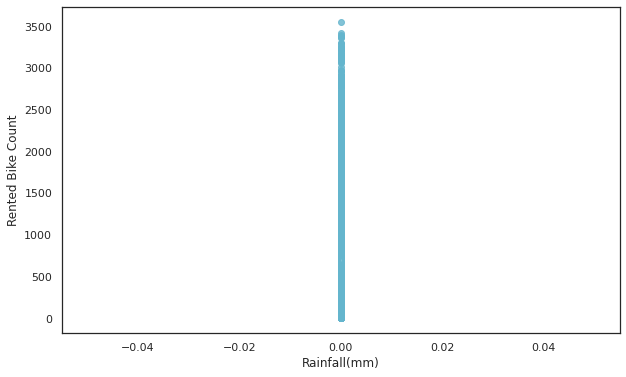

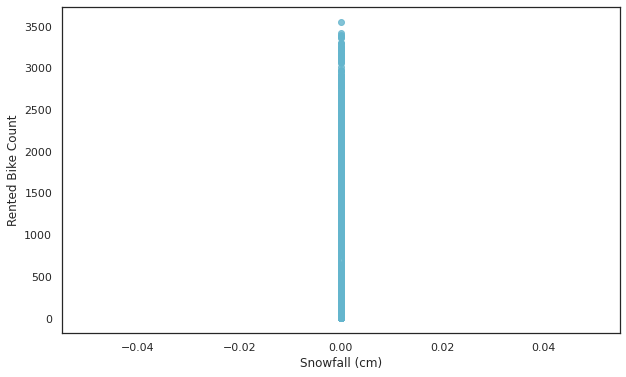

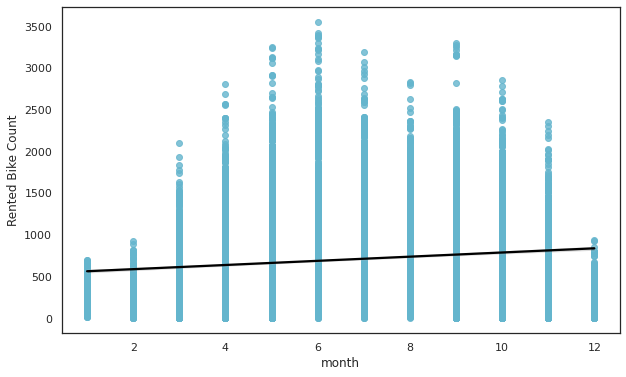

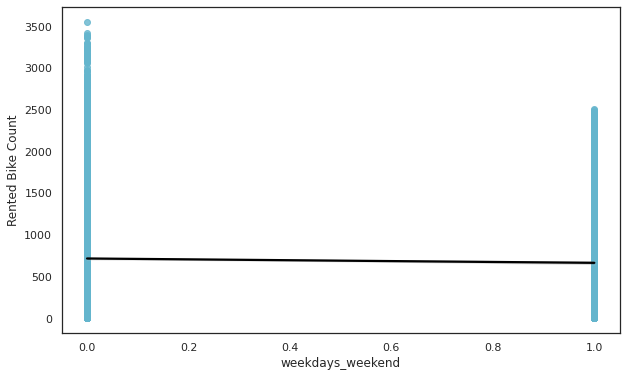

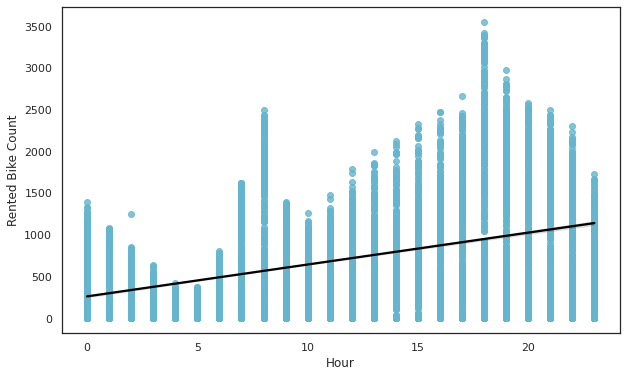

In [41]:
for col in numerical_var:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

*   Temperature,  Wind Speed, Visibility, Solar Radiation, month, hour are positively relation with dependent variable, when dependent variable increases, these feature increases 
*   Humidity, Weekdays_Weekend are negatively relation with dependent variable,  when dependent variable decrease, these feature decreases

#**Categorical Variables**

Three of the 14 columns—the **seasons, holidays, and functioning days**—are categorical datatypes.

In [42]:
categorical_columns=['Seasons','Holiday', 'Functioning Day']
df[categorical_columns].head()

Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes

**Distribution of categorical variables**

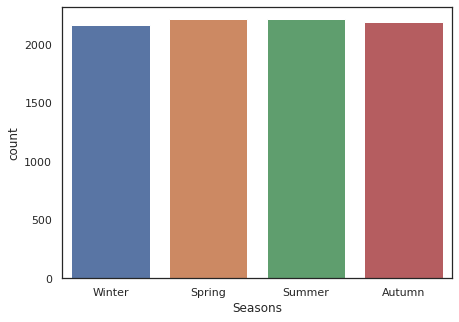

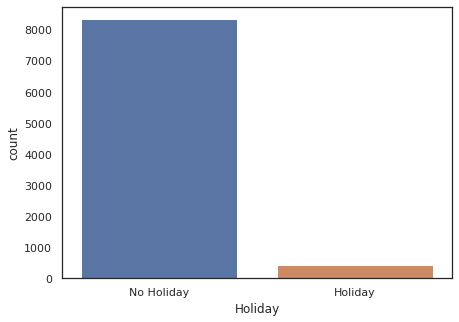

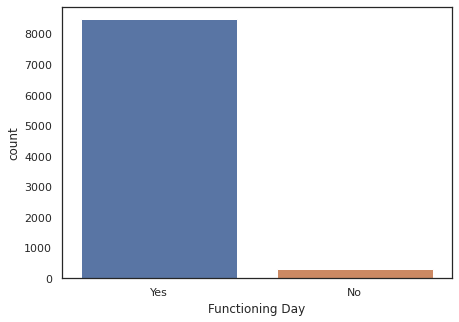

In [43]:
#Let's countplot the date variable for each column.
for col in categorical_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[col])
  plt.xlabel(col)
plt.show()

**Categorical variable versus dependent variable distribution**

Text(0, 0.5, 'Rented Bike Count')

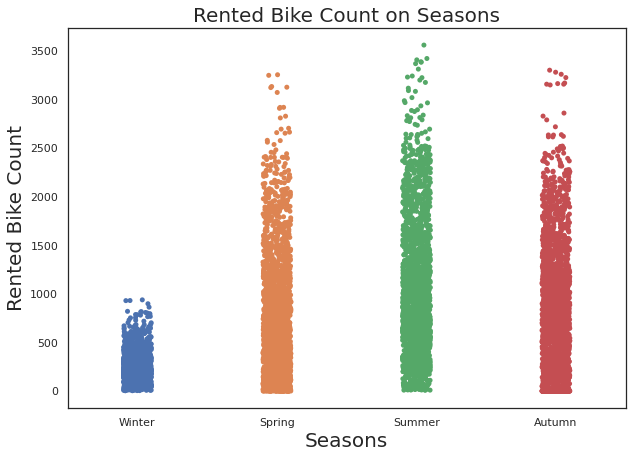

In [44]:
#distribution plot Seasons vs Rented Bike Count
plt.figure(figsize=(10,7))
sns.set(style='white')
ax=sns.stripplot(x='Seasons', y='Rented Bike Count',data=df,jitter=True) 
ax.set_title('Rented Bike Count on Seasons',fontsize=20)
ax.set_xlabel("Seasons",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)


*    Summer is the season with the most demand for bikes, followed by Autumn, Spring, and Winter.

*   Bike rentals are highest during the summer and are lowest during the winter.



Text(0, 0.5, 'Rented Bike Count')

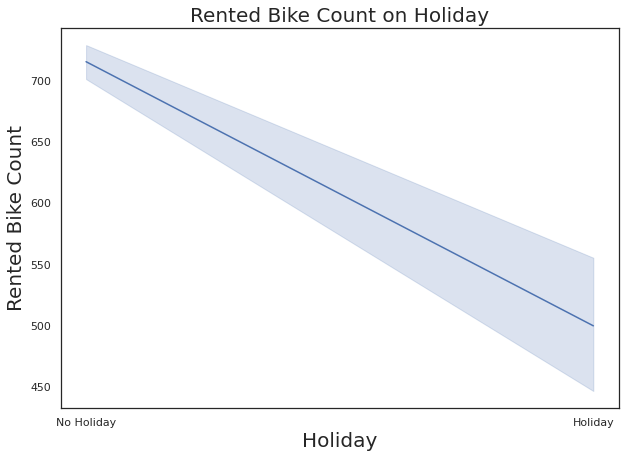

In [45]:
#distribution plot Holiday vs Rented Bike Count
plt.figure(figsize=(10,7))
sns.set(style='white')
ax=sns.lineplot(x='Holiday', y='Rented Bike Count',data=df) 
ax.set_title('Rented Bike Count on Holiday',fontsize=20)
ax.set_xlabel("Holiday",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   According to the plot above, more people hired bikes during non-holiday times than during holiday times

Text(0, 0.5, 'Rented Bike Count')

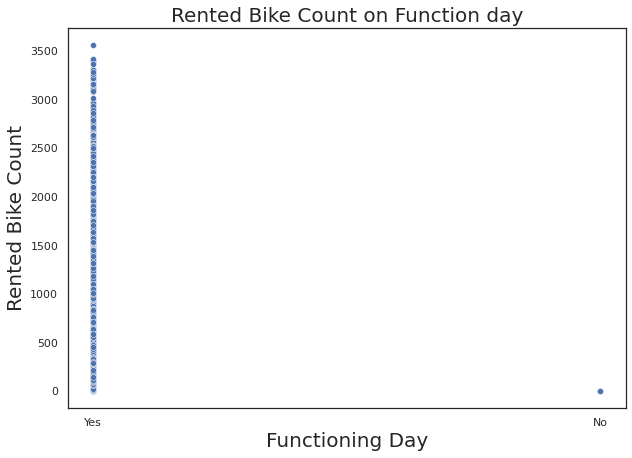

In [46]:
#distribution plot Functioning Day vs Rented Bike Count
plt.figure(figsize=(10,7))
sns.set(style='white')
ax=sns.scatterplot(x='Functioning Day', y='Rented Bike Count',data=df) 
ax.set_title('Rented Bike Count on Function day',fontsize=20)
ax.set_xlabel("Functioning Day",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)

*   According to the plot above, people leased bikes when the day was operational, but they didn't rent any on non-operational days.

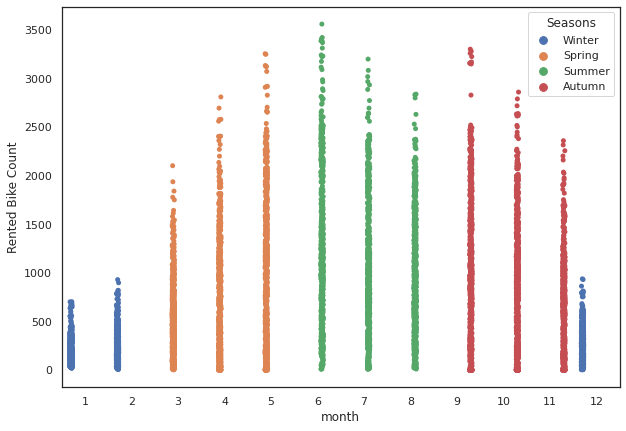

In [47]:
#distribution plot month vs Rented Bike Count
plt.figure(figsize=(10,7))
sns.stripplot(x ='month', y ='Rented Bike Count', data = df,jitter = True, hue ='Seasons', dodge = True)

**From the plot above:**


*   Most bikes were hired in the sixth, seventh, and eighth months of the summer.

*   When compared to summer, the number of bikes hired in the ninth, tenth, and eleventh months of the season is quite low.
*   Comparatively fewer bikes are leased during the third and fourth months of the spring season than during the summer and the Autumn.

*   Comparatively fewer bikes are hired during the winter months of first, second, and third than during the summer, autumn, and spring.

Summer Season is the peak season where most people hired a bike. There is a lot of demand for bikes in summer season than compare to other seasons

**Pointplot Representation**

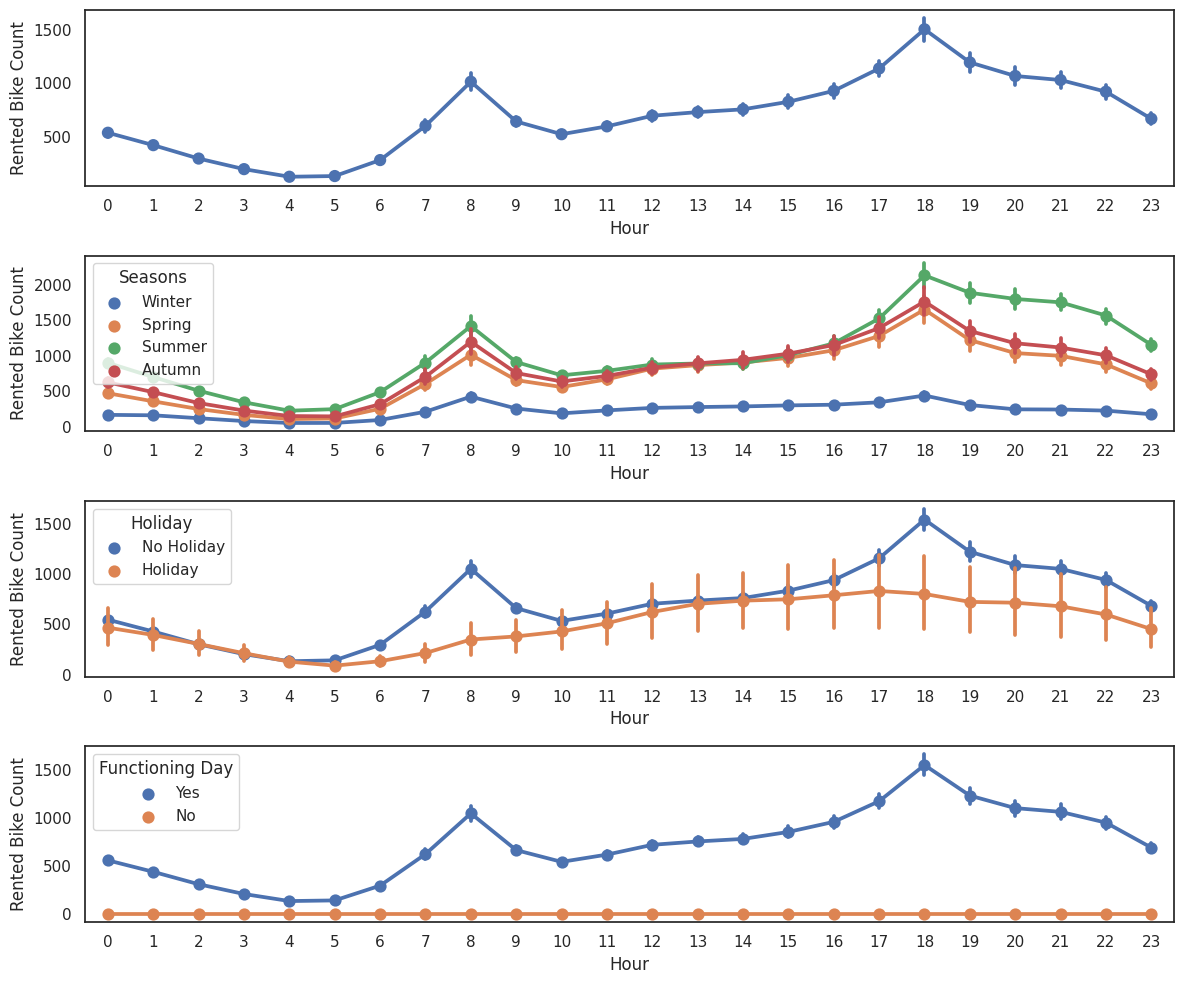

In [48]:
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1],hue='Seasons')
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2],hue='Holiday')
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3],hue='Functioning Day')
plt.tight_layout()

**From the above pointplot representation:**

*   Above 1500 rented bikes during the 18th hour, while only 100 did so between the 4th and 5th hour.

*   In the summer, the number of persons hired bikes is highest in the 18th hour, which was above 2000, and is lowest in the 4th to 5th hour, which was near to 500.

*   Less people hired bikes during the 4th to 5th hours, which were approximately 300, and more during the 18th hour, which was above 1500 during the autumn season.
*   Less people hired bikes during the 4th to 5th hours, which were above 100, and more during the 18th hour, which was approximately 1300 during the spring season.

*   Less people hired bikes during the 4th to 5th hours, which were approximately 10, than during the 18th hour, which was peak during the autumn season.

*   In comparison to holidays, people hired more bikes when there was no holiday and when businesses were open.

In the summer, when there are no holidays and the day is still operating, people choose to rent and ride more bikes at that time.Bikes are in great demand and good supply at 18 hours during the summer.

#**Feature Engineering**

**Feature encoding:**

The process of converting categorical data in a dataset into numerical data is called feature encoding.

we have to encode Seasons, Holiday and Functioning Day.

In [49]:
#Encoding for Seasons column
df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

In [50]:
#Encoding for Holiday column
df['Holiday'] = np.where(df['Holiday']=='Holiday',1,0)

In [51]:
#Encoding for Functioning day
df['Functioning Day'] = np.where(df['Functioning Day']=='Yes',1,0)

In [52]:
#droping of seasonal column
df.drop(columns=['Seasons'],axis=1,inplace=True)

In [53]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  month  weekdays_weekend  Winter  Spring  Summer  \
0        0                1     12                 0       1       0       0   
1        0                1     12                 0       1       0       0   
2        0                1     12                 0       1       0       0   
3        0                1     12                 0       1       0       0   
4        0                1     12                 0       1       0       0   

   Autumn  
0       0  
1       0  
2       0  
3       0  
4       0

**Train Test Split**

In [54]:
#Assign the value in X and Y
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [55]:
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  month  weekdays_weekend  Winter  Spring  Summer  Autumn  
0                1     12                 0       1       0       0       0  
1                1     12                 0       1       0       0       0  
2                1     12                 0       1       0       0       0  
3                1     12                 0       1       0       0       0  
4                1     12                 0       1       0       0       0

In [56]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [57]:
#Creat train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(f"the train shape {X_train.shape} and {y_train.shape}")
print(f"the train shape {X_test.shape} and {y_test.shape}")

the train shape (6570, 16) and (6570,)
the train shape (2190, 16) and (2190,)


**Feature Scaling**

The process of feature scaling is used to standardise the range of independent variables or features in data. Scale data to improve machine learning model performance. There are many techniques used in feature scaling, here we will standard scaler.

In [58]:
#Creat an object of Standard Scaler
scaler = StandardScaler()
# standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#**Model Implementation:**



*   A file that has been trained to recognise particular patterns is known as a machine learning model. A model is trained using a set of data and an algorithm that allows it to analyse and learn from the data.

*   The goal of creating a machine learning model is to address a problem, and a machine learning model can only achieve this if it is actively used by consumers and in production.

How to pick a model for a particular machine learning problem?

We will be using regression models because this project involves dealing with a regression problem.



#Linear Regression 

Linear Regression is the supervised Machine Learning model in which the model finds the linear relationship between the dependent and independent variable.
Implementation assumption for linear regression:
*   The dataset has no multicollinearity.
*   Independent variables ought to have a straight line connection with dependent varibale.
*   The residual mean should be zero or nearly zero.
*   Heteroscedasticity should not exist; the variance should be constant along the line of best fit.

In [59]:
#Multiple linear regression is fitted to the training set.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
#Evaluate the coefficient
regressor.coef_

array([ 3.32041206e+00,  5.21226784e+00, -3.16220816e+00,  3.15392682e-02,
        3.46836790e-01,  1.92706197e-01,  0.00000000e+00, -3.33066907e-16,
       -6.76131773e-01,  4.96309007e+00,  5.77831727e-01, -6.39991309e-01,
       -1.92046783e+00,  3.98102957e-01,  2.50517869e-01,  1.26431521e+00])

In [61]:
#checking the score
print("The train score is :", round(regressor.score(X_train, y_train),2))
print("The test score is :", round(regressor.score(X_test, y_test),2))

The train score is : 0.63
The test score is : 0.64


In [62]:
y_pred_train_linear=regressor.predict(X_train)
y_pred_test_linear=regressor.predict(X_test)

In [63]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)
Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 56.418109292164814
RMSE : 7.511198925082787
MAE : 5.783892204780704
R2 : 0.6336264653662863
Adjusted R2 : 0.6309288231416479
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 56.94581492206735
RMSE : 7.546245087596039
MAE : 5.859793819749915
R2 : 0.6395067956464002
Adjusted R2 : 0.636852450837538


Text(0.5, 1.0, 'Actual vs Predicted values')

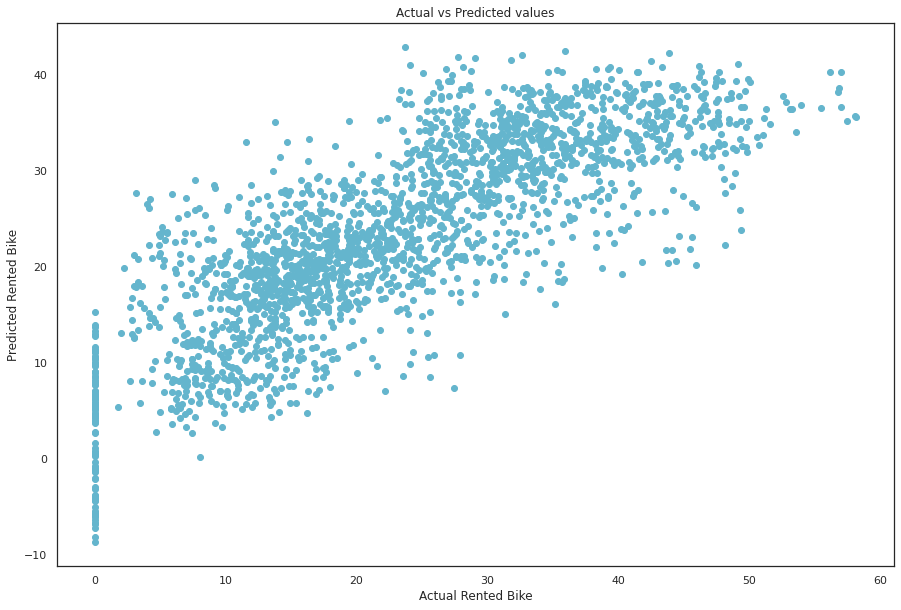

In [64]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_linear,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

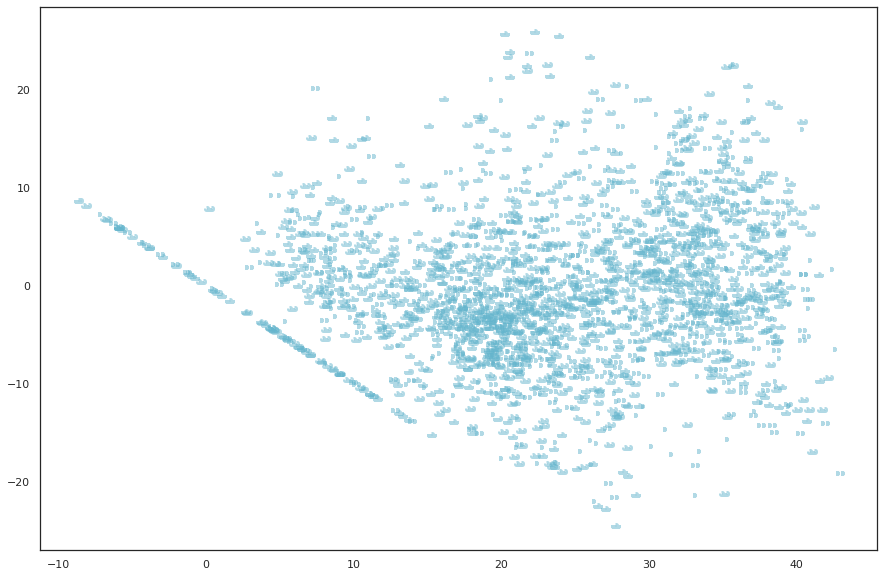

In [65]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_linear,y_test-y_pred_test_linear,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Lasso Regression (L1 Regularization)

In [66]:
#Training the lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso_model_grid = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01]},
             scoring='neg_mean_squared_error')

In [67]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in lasso regression is: {lasso_model_grid.best_params_}')
print(f'Using {lasso_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in lasso regression is: {'alpha': 0.02}
Using {'alpha': 0.02} as the value of aplha gives us a negative mean squared error of: -56.720285341364026


In [68]:
#Fit Model
lasso_model=Lasso(alpha=0.02).fit(X_train,y_train)

In [69]:
#Predict train & test values
y_pred_train_lasso=lasso_model.predict(X_train)
y_pred_test_lasso=lasso_model.predict(X_test)

In [70]:
#checking the score
print("The train score is :", round(lasso_model.score(X_train, y_train),2))
print("The test score is :", round(lasso_model.score(X_test, y_test),2))

The train score is : 0.63
The test score is : 0.64


In [71]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_lasso_train= mean_squared_error(y_train, y_pred_train_lasso)
print("MSE :",MSE_lasso_train)

#calculate RMSE
RMSE_lasso_train=np.sqrt(MSE_lasso_train)
print("RMSE :",RMSE_lasso_train)

#calculate MAE
MAE_lasso_train= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso_train)

#calculate r2 and adjusted r2
R2_lasso_train= r2_score(y_train,y_pred_train_lasso)
print("R2 :",R2_lasso_train)
Adjusted_R2_lasso_train = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_lasso_test= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso_test)

#calculate RMSE
RMSE_lasso_test=np.sqrt(MSE_lasso_test)
print("RMSE :",RMSE_lasso_test)

#calculate MAE
MAE_lasso_test= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso_test)

#calculate r2 and adjusted r2
R2_lasso_test= r2_score(y_test, y_pred_test_lasso)
print("R2 :",R2_lasso_test)
Adjusted_R2_lasso_test = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lasso_test)

Evaluation metrics for training data

MSE : 56.423675208851606
RMSE : 7.5115694238189405
MAE : 5.783033734960269
R2 : 0.6335903208624099
Adjusted R2 : 0.630892412502446
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 56.969413820881016
RMSE : 7.547808544265084
MAE : 5.861281771357812
R2 : 0.6393574037610756
Adjusted R2 : 0.6367019589659433


Text(0.5, 1.0, 'Actual vs Predicted values')

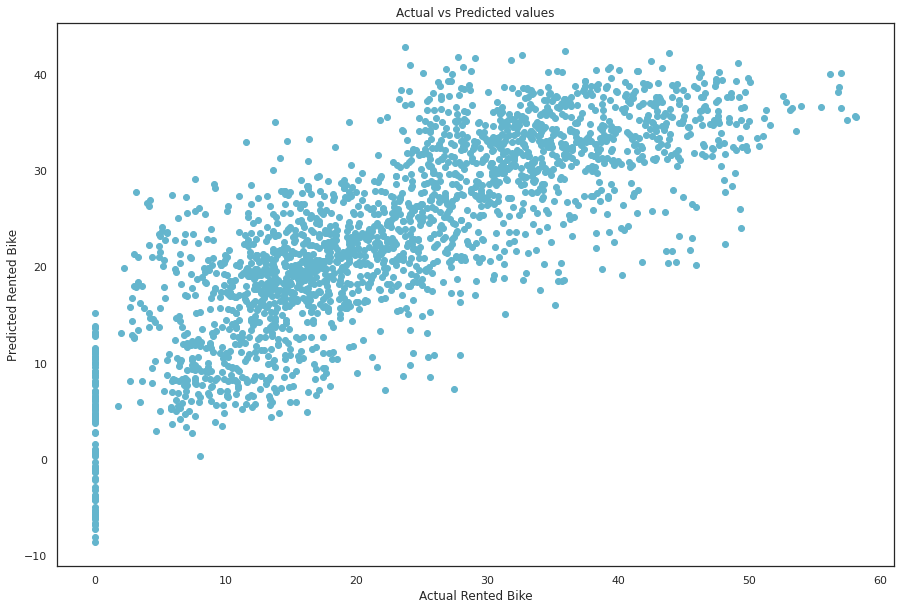

In [72]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_lasso,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

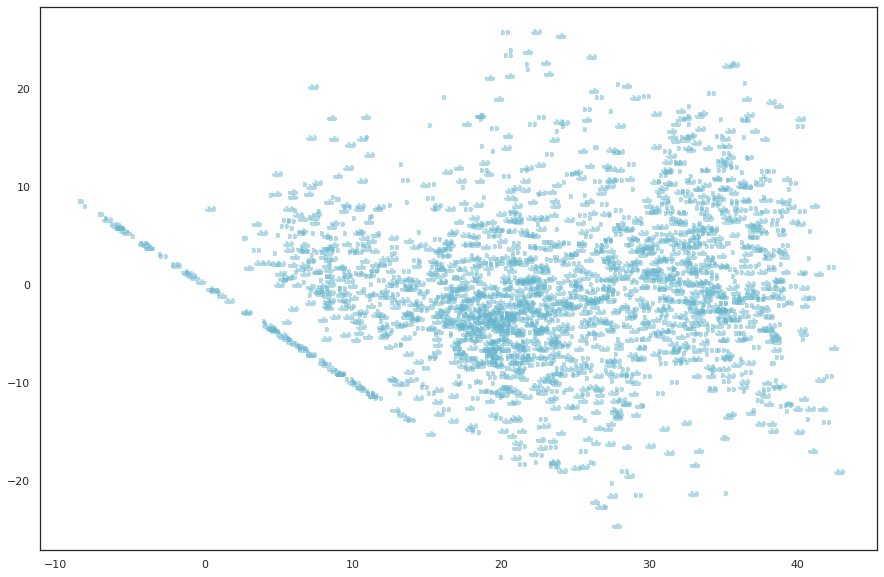

In [73]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_lasso,y_test-y_pred_test_lasso,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#RIDGE REGRESSION (L2 Regularization)

In [74]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
ridge_model_grid = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01]},
             scoring='neg_mean_squared_error')

In [75]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in ridge regression is: {ridge_model_grid.best_params_}')
print(f'Using {ridge_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in ridge regression is: {'alpha': 1.0}
Using {'alpha': 1.0} as the value of aplha gives us a negative mean squared error of: -56.72277290567111


In [76]:
#Fit Model
ridge_model=Ridge(alpha=1.0).fit(X_train,y_train)

In [77]:
#Predict train & test values
y_pred_train_ridge=ridge_model.predict(X_train)
y_pred_test_ridge=ridge_model.predict(X_test)

In [78]:
#checking the score
print("The train score is :", round(ridge_model.score(X_train, y_train),2))
print("The test score is :", round(ridge_model.score(X_test, y_test),2))

The train score is : 0.63
The test score is : 0.64


In [79]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_ridge_train= mean_squared_error(y_train, y_pred_train_ridge)
print("MSE :",MSE_ridge_train)

#calculate RMSE
RMSE_ridge_train=np.sqrt(MSE_ridge_train)
print("RMSE :",RMSE_ridge_train)

#calculate MAE
MAE_ridge_train= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge_train)

#calculate r2 and adjusted r2
R2_ridge_train= r2_score(y_train,y_pred_train_ridge)
print("R2 :",R2_ridge_train)
Adjusted_R2_ridge_train = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_ridge_test= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge_test)

#calculate RMSE
RMSE_ridge_test=np.sqrt(MSE_ridge_test)
print("RMSE :",RMSE_ridge_test)

#calculate MAE
MAE_ridge_test= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge_test)

#calculate r2 and adjusted r2
R2_ridge_test= r2_score(y_test, y_pred_test_ridge)
print("R2 :",R2_ridge_test)
Adjusted_R2_ridge_test = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_ridge_test)

Evaluation metrics for training data

MSE : 56.41811221970026
RMSE : 7.511199119960825
MAE : 5.7839164122671685
R2 : 0.6336264463551653
Adjusted R2 : 0.6309288039905462
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 56.94664012771554
RMSE : 7.546299763971448
MAE : 5.859868048756939
R2 : 0.6395015717150407
Adjusted R2 : 0.6368471884418887


Text(0.5, 1.0, 'Actual vs Predicted values')

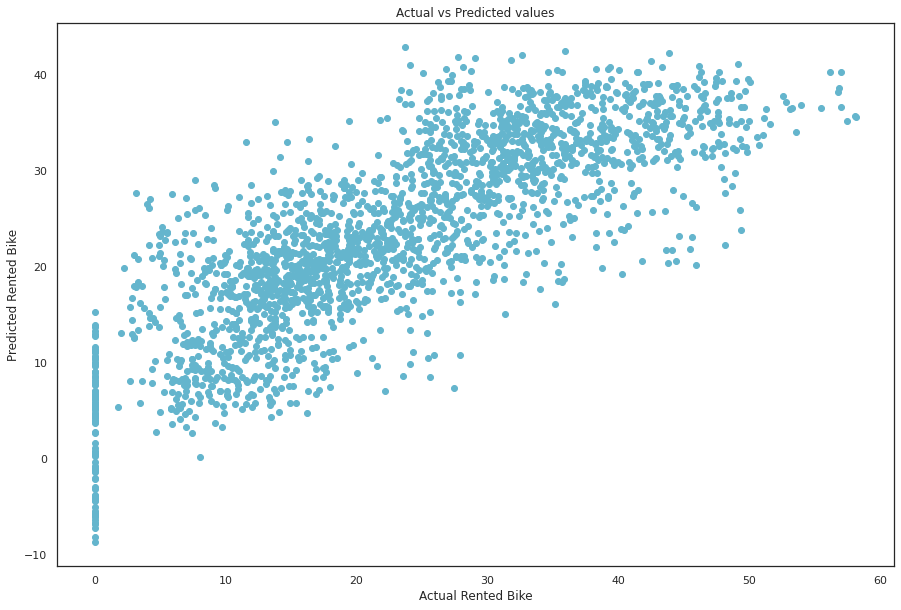

In [80]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_ridge,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

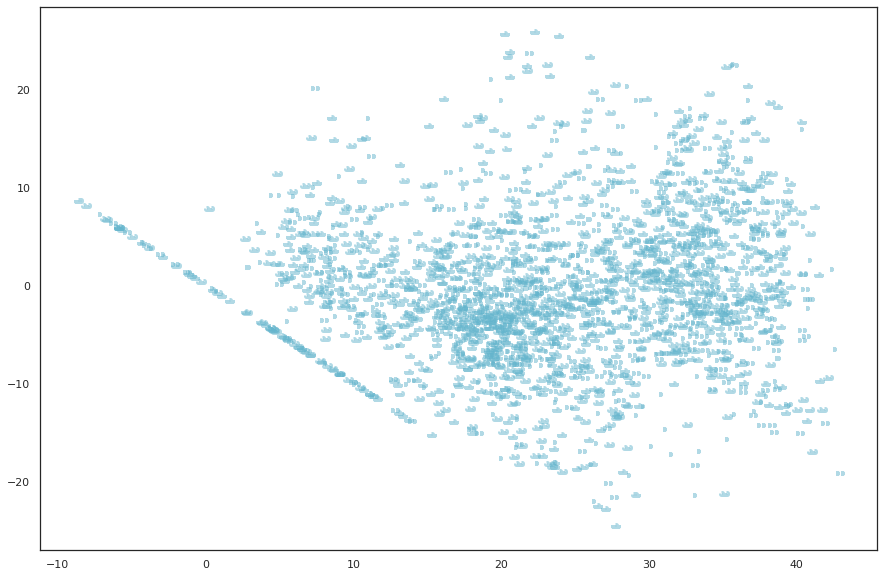

In [81]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_ridge,y_test-y_pred_test_ridge,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Elastic Net Regression

In [82]:
#Training the ElasticNet regression model using GridSearchCV
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

elastic = ElasticNet()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_model_grid = GridSearchCV(elastic, parameters,scoring='neg_mean_squared_error', cv=5)
elastic_model_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [83]:
#Getting the best parameters for elastcinet regression
print(f'Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {elastic_model_grid.best_params_}')
print(f'Using {elastic_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {elastic_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {'alpha': 0.01, 'l1_ratio': 0.5}
Using {'alpha': 0.01, 'l1_ratio': 0.5} as the value of aplha gives us a negative mean squared error of: -56.72071709307537


In [84]:
#Fitting the elastic regression model 
elasticnet_model=ElasticNet(alpha=0.01,l1_ratio=0.5).fit(X_train,y_train)

In [85]:
#Predict train & test values
y_pred_train_elastic=elasticnet_model.predict(X_train)
y_pred_test_elastic=elasticnet_model.predict(X_test)

In [86]:
#checking the score
print("The train score is :", round(elasticnet_model.score(X_train, y_train),2))
print("The test score is :", round(elasticnet_model.score(X_test, y_test),2))

The train score is : 0.63
The test score is : 0.64


In [87]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_elastic_train= mean_squared_error(y_train, y_pred_train_elastic)
print("MSE :",MSE_elastic_train)

#calculate RMSE
RMSE_elastic_train=np.sqrt(MSE_elastic_train)
print("RMSE :",RMSE_elastic_train)

#calculate MAE
MAE_elastic_train= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic_train)

#calculate r2 and adjusted r2
R2_elastic_train= r2_score(y_train,y_pred_train_elastic)
print("R2 :",R2_elastic_train)
Adjusted_R2_elastic_train = (1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_elastic_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_elastic_test= mean_squared_error(y_test, y_pred_test_elastic)
print("MSE :",MSE_elastic_test)

#calculate RMSE
RMSE_elastic_test=np.sqrt(MSE_elastic_test)
print("RMSE :",RMSE_elastic_test)

#calculate MAE
MAE_elastic_test= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic_test)

#calculate r2 and adjusted r2
R2_elastic_test= r2_score(y_test, y_pred_test_elastic)
print("R2 :",R2_elastic_test)
Adjusted_R2_elastic_test = (1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_elastic_test)

Evaluation metrics for training data

MSE : 56.422293550093435
RMSE : 7.511477454542045
MAE : 5.784262630533567
R2 : 0.6335992932155999
Adjusted R2 : 0.6309014509199026
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 56.98349402489007
RMSE : 7.548741221216295
MAE : 5.862294065798312
R2 : 0.6392682695926013
Adjusted R2 : 0.6366121684943415


Text(0.5, 1.0, 'Actual vs Predicted values')

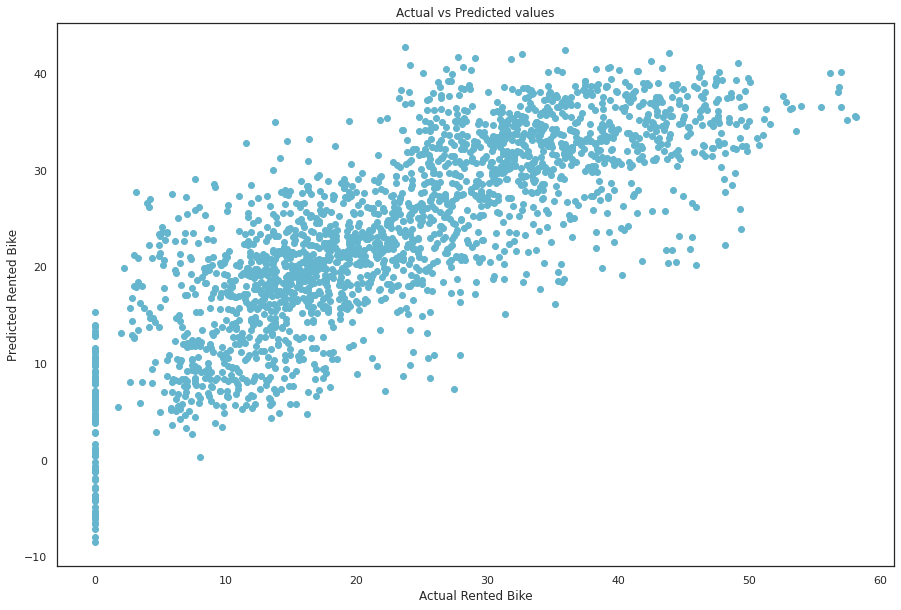

In [88]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_elastic,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

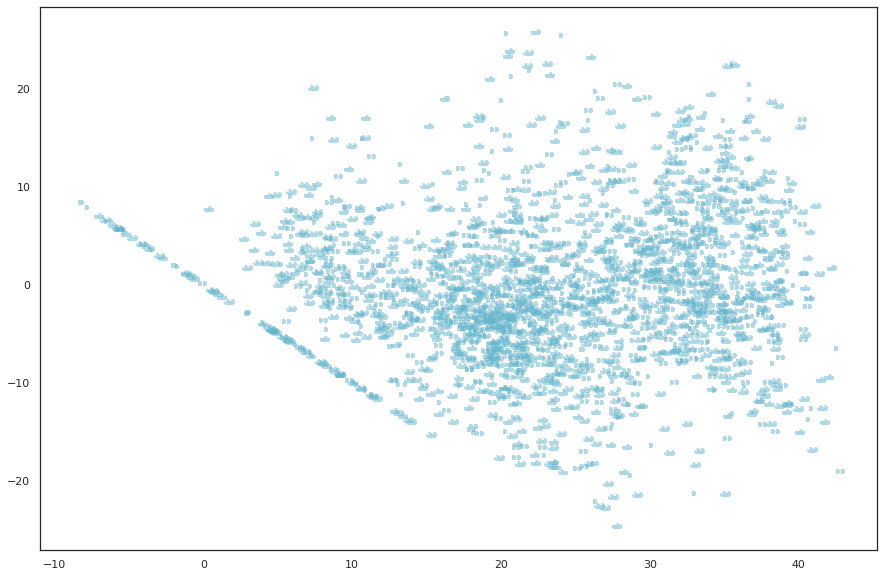

In [89]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_elastic,y_test-y_pred_test_elastic,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Decision Tree

In [90]:
#Fit Model
dec_regressor = DecisionTreeRegressor(max_depth=10,max_features=10, max_leaf_nodes=200,random_state=0)
dec_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=10, max_leaf_nodes=200,
                      random_state=0)

In [91]:
#Predict train & test values
y_pred_train_dec = dec_regressor.predict(X_train)
y_pred_test_dec = dec_regressor.predict(X_test)

In [92]:
#checking the score
print("The train score is :", round(dec_regressor.score(X_train, y_train),2))
print("The test score is :", round(dec_regressor.score(X_test, y_test),2))

The train score is : 0.87
The test score is : 0.82


In [93]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_dec_train= mean_squared_error(y_train, y_pred_train_dec)
print("MSE :",MSE_dec_train)

#calculate RMSE
RMSE_dec_train=np.sqrt(MSE_dec_train)
print("RMSE :",RMSE_dec_train)

#calculate MAE
MAE_dec_train= mean_absolute_error(y_train, y_pred_train_dec)
print("MAE :",MAE_dec_train)

#calculate r2 and adjusted r2
R2_dec_train= r2_score(y_train,y_pred_train_dec)
print("R2 :",R2_dec_train)
Adjusted_R2_dec_train = (1-(1-r2_score(y_train, y_pred_train_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dec_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_dec_test= mean_squared_error(y_test, y_pred_test_dec)
print("MSE :",MSE_dec_test)

#calculate RMSE
RMSE_dec_test=np.sqrt(MSE_dec_test)
print("RMSE :",RMSE_dec_test)

#calculate MAE
MAE_dec_test= mean_absolute_error(y_test, y_pred_test_dec)
print("MAE :",MAE_dec_test)

#calculate r2 and adjusted r2
R2_dec_test= r2_score(y_test, y_pred_test_dec)
print("R2 :",R2_dec_test)
Adjusted_R2_dec_test = (1-(1-r2_score(y_test, y_pred_test_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_dec_test)

Evaluation metrics for training data

MSE : 19.446502790433495
RMSE : 4.409818906761761
MAE : 2.987419974575672
R2 : 0.8737163642492899
Adjusted R2 : 0.8727865261581664
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 27.91530037813744
RMSE : 5.283493198456627
MAE : 3.542100932944704
R2 : 0.8232833071652408
Adjusted R2 : 0.8219821258098077


Text(0.5, 1.0, 'Actual vs Predicted values')

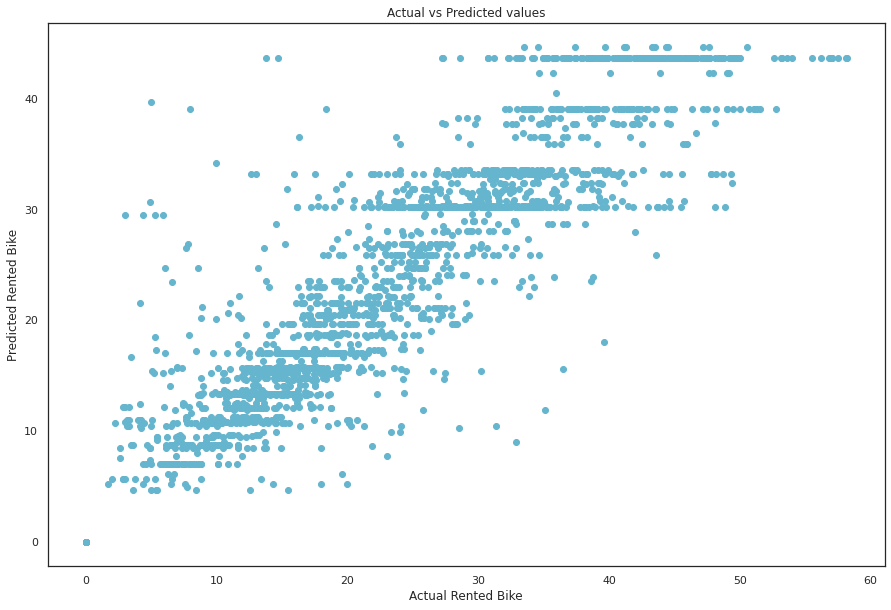

In [94]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_dec,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

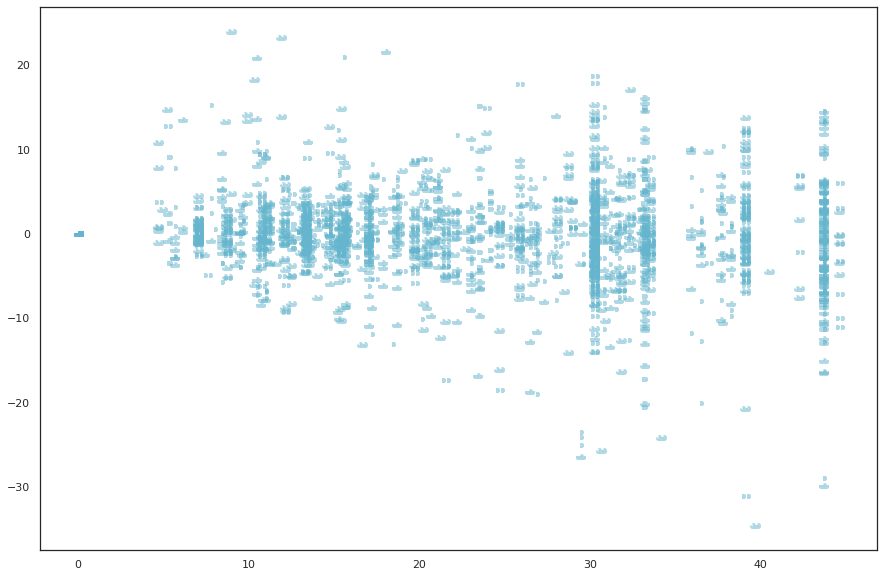

In [95]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_dec,y_test-y_pred_test_dec,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Random Forest Regressor

In [96]:
# #creating paramdict to check random forest with diffirent value of parameter through gridsearch
rf_model= RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [97]:
#Fit Model
rf_regressor= GridSearchCV(rf_model,param_grid=params,verbose=0)
rf_regressor.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'max_leaf_nodes': [40, 60, 80],
                         'n_estimators': [60, 80, 100]})

In [98]:
optimal_rf_model=rf_regressor.best_estimator_

In [99]:
#Predict train & test values
y_pred_train_rf = optimal_rf_model.predict(X_train)
y_pred_test_rf = optimal_rf_model.predict(X_test)

In [100]:
#checking the score
print("The train score is :", round(optimal_rf_model.score(X_train, y_train),2))
print("The test score is :", round(optimal_rf_model.score(X_test, y_test),2))

The train score is : 0.91
The test score is : 0.89


In [101]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_rf_train= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf_train)

#calculate RMSE
RMSE_rf_train=np.sqrt(MSE_rf_train)
print("RMSE :",RMSE_rf_train)

#calculate MAE
MAE_rf_train= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf_train)

#calculate r2 and adjusted r2
R2_rf_train= r2_score(y_train,y_pred_train_rf)
print("R2 :",R2_rf_train)
Adjusted_R2_rf_train = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_rf_test= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf_test)

#calculate RMSE
RMSE_rf_test=np.sqrt(MSE_rf_test)
print("RMSE :",RMSE_rf_test)

#calculate MAE
MAE_rf_test= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf_test)

#calculate r2 and adjusted r2
R2_rf_test= r2_score(y_test, y_pred_test_rf)
print("R2 :",R2_rf_test)
Adjusted_R2_rf_test = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_rf_test)

Evaluation metrics for training data

MSE : 14.177819304615854
RMSE : 3.765344513403236
MAE : 2.6817566767394974
R2 : 0.9079306655752891
Adjusted R2 : 0.9072527505496124
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 18.14106410109357
RMSE : 4.259232806632383
MAE : 2.9468881954317996
R2 : 0.8851587190887134
Adjusted R2 : 0.8843131321146772


Text(0.5, 1.0, 'Actual vs Predicted values')

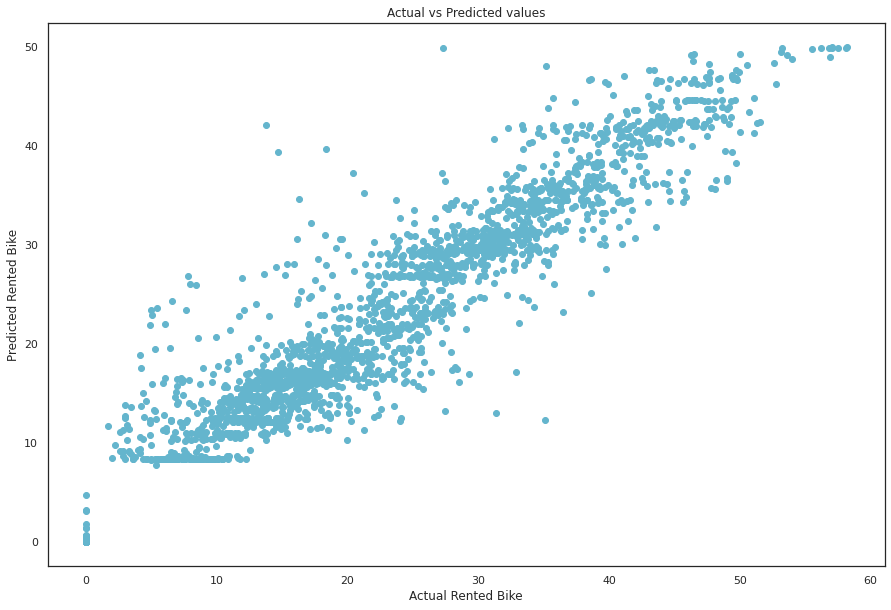

In [102]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_rf,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

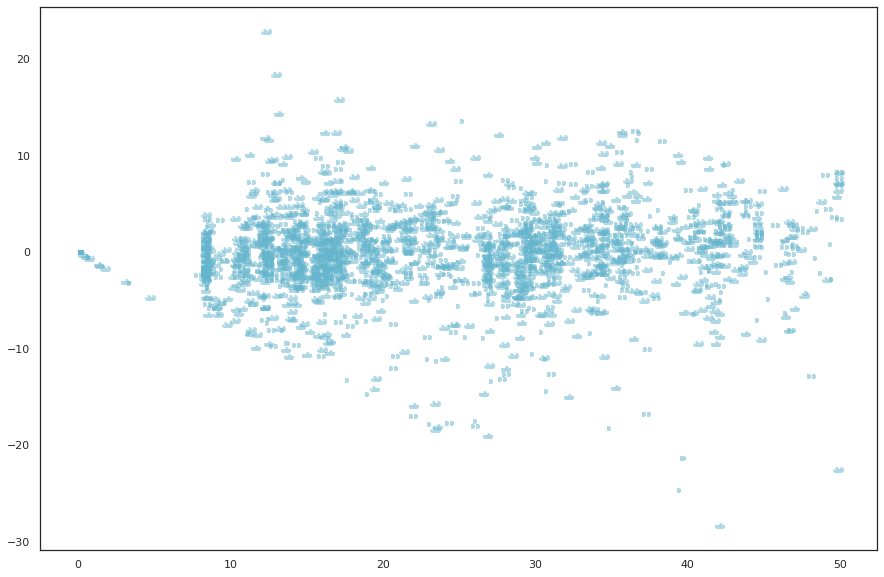

In [103]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_rf,y_test-y_pred_test_rf,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

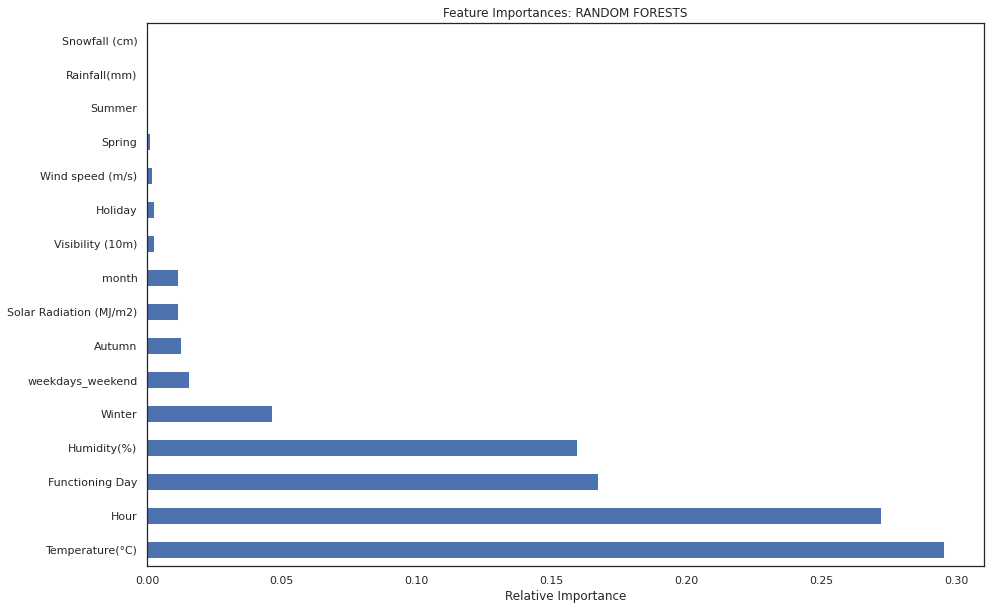

In [104]:
# Feature importances
rf_feature_imp = pd.Series(optimal_rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(15,10))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feature_imp.nlargest(20).plot(kind='barh')

*   The most crucial feature taken into account when utilising a random forest to make predictions is temperature.

#GRADIENT BOOSTING

In [105]:
# Create an instance of the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor()

In [106]:
#Predict train & test values
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

In [107]:
#checking the score
print("The train score is :", round(gb_regressor.score(X_train, y_train),2))
print("The test score is :", round(gb_regressor.score(X_test, y_test),2))

The train score is : 0.89
The test score is : 0.87


In [108]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_gb_train= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb_train)

#calculate RMSE
RMSE_gb_train=np.sqrt(MSE_gb_train)
print("RMSE :",RMSE_gb_train)

#calculate MAE
MAE_gb_train= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb_train)

#calculate r2 and adjusted r2
R2_gb_train= r2_score(y_train,y_pred_train_gb)
print("R2 :",R2_gb_train)
Adjusted_R2_gb_train = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_gb_test= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb_test)

#calculate RMSE
RMSE_gb_test=np.sqrt(MSE_gb_test)
print("RMSE :",RMSE_gb_test)

#calculate MAE
MAE_gb_test= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb_test)

#calculate r2 and adjusted r2
R2_gb_test= r2_score(y_test, y_pred_test_gb)
print("R2 :",R2_gb_test)
Adjusted_R2_gb_test = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb_test)

Evaluation metrics for training data

MSE : 17.693951900738686
RMSE : 4.206417941757414
MAE : 2.98048631502707
R2 : 0.8850972536860104
Adjusted R2 : 0.8842512141365287
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 20.139893585162206
RMSE : 4.4877492783312
MAE : 3.18541313196415
R2 : 0.8725052089641419
Adjusted R2 : 0.8715664530246233


Text(0.5, 1.0, 'Actual vs Predicted values')

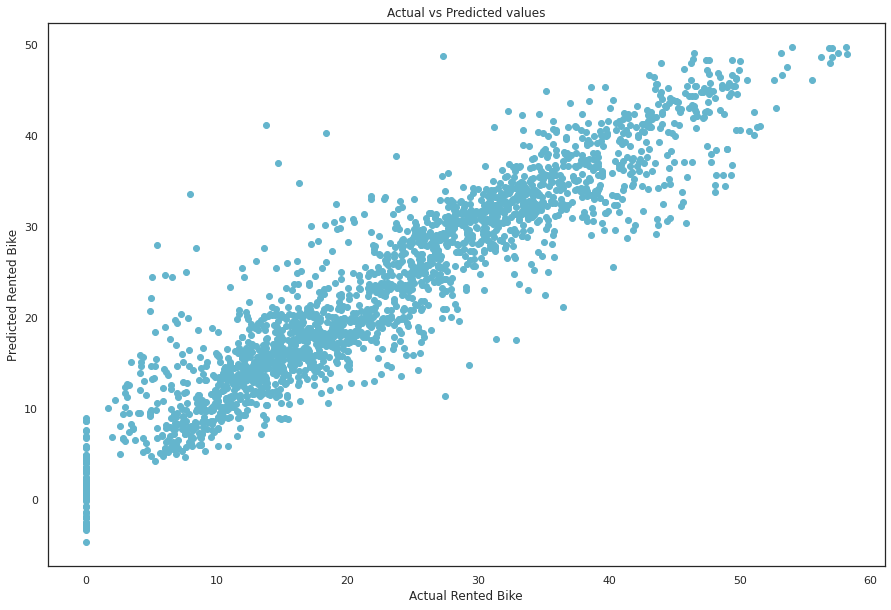

In [109]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_gb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

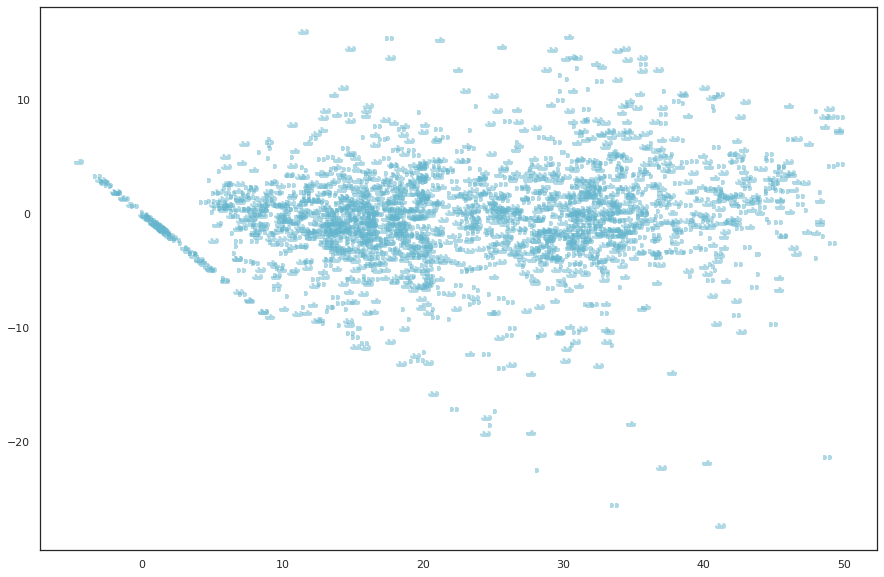

In [110]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_gb,y_test-y_pred_test_gb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

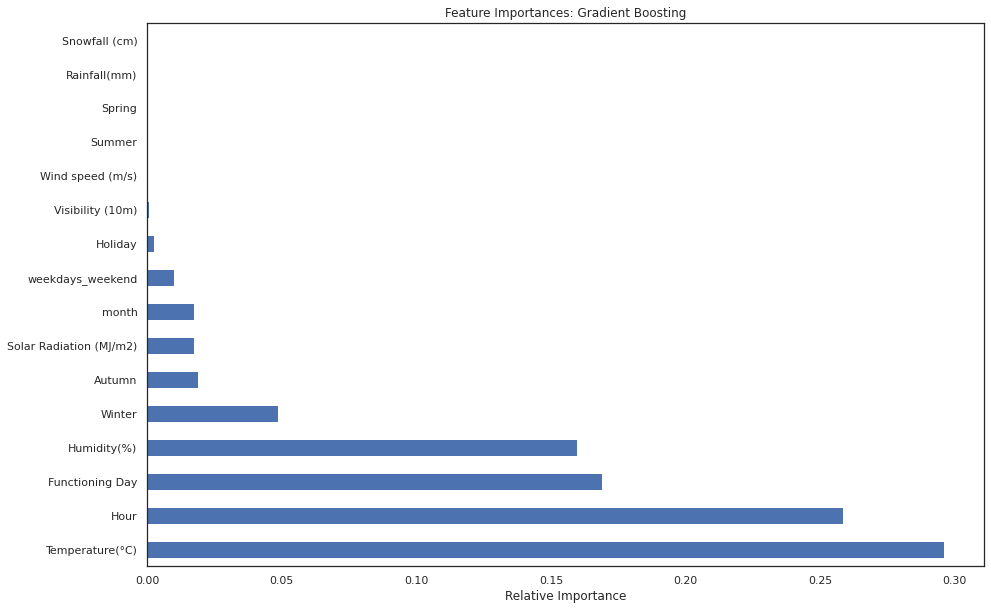

In [111]:
# Feature importances
rf_feature_imp = pd.Series(gb_regressor.feature_importances_,index=X.columns)
plt.figure(figsize=(15,10))
plt.title('Feature Importances: Gradient Boosting')
plt.xlabel('Relative Importance')
rf_feature_imp.nlargest(20).plot(kind='barh')

*   The most crucial feature taken into account when utilising a gradient boosting to make predictions is temperature.

#XG Boost

In [112]:
# #creating paramdict to check XGBoost with diffirent value of parameter through gridsearch
xgb_model=XGBRegressor()
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [113]:
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict,cv = 5, verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[12:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[12:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[12:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[12:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[12:38:48] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [114]:
xgb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [115]:
xgb_optimal_model = xgb_grid.best_estimator_

In [116]:
#Predict train & test values
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)

In [117]:
#checking the score
print("The train score is :", round(xgb_optimal_model.score(X_train, y_train),2))
print("The test score is :", round(xgb_optimal_model.score(X_test, y_test),2))

The train score is : 0.98
The test score is : 0.94


In [118]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb)
print("R2 :",R2_xgb_train)
Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb)
print("R2 :",R2_xgb_test)
Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 2.3782890855300356
RMSE : 1.5421702517977824
MAE : 1.0099584015129037
R2 : 0.9845556295739348
Adjusted R2 : 0.9844419112459012
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 10.165640571321399
RMSE : 3.188360169636015
MAE : 1.9972983176382784
R2 : 0.9356468188421252
Adjusted R2 : 0.9351729804166645


Text(0.5, 1.0, 'Actual vs Predicted values')

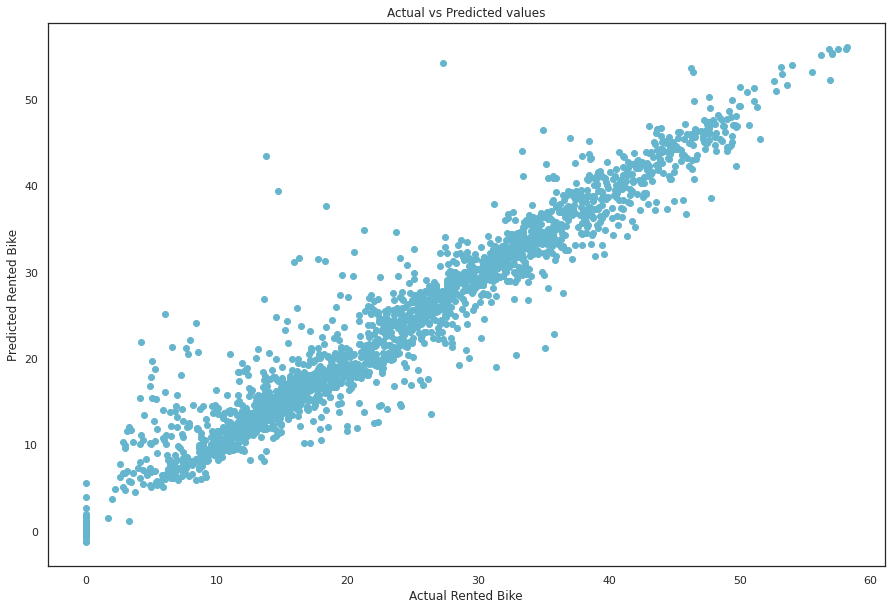

In [119]:
#Plotting the figure actual vs predicted 
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_xgb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

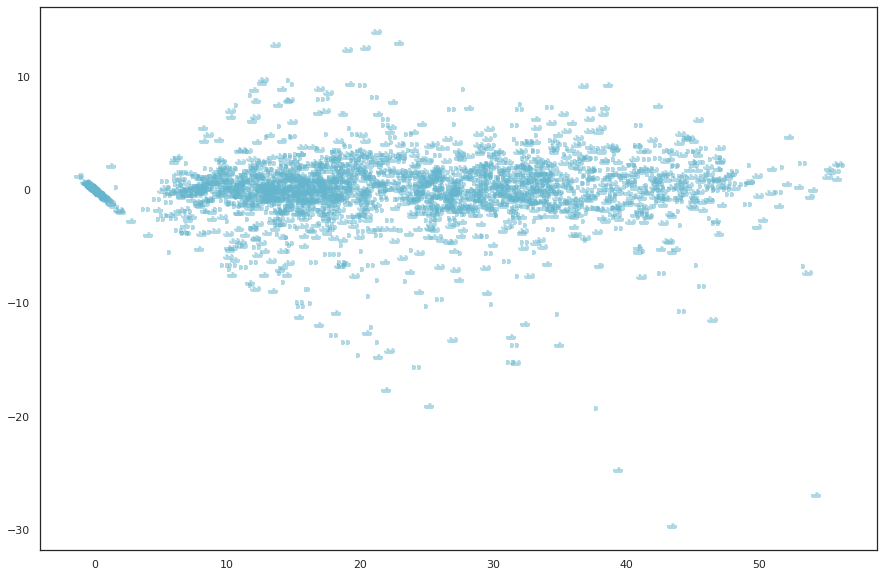

In [120]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_xgb,y_test-y_pred_test_xgb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

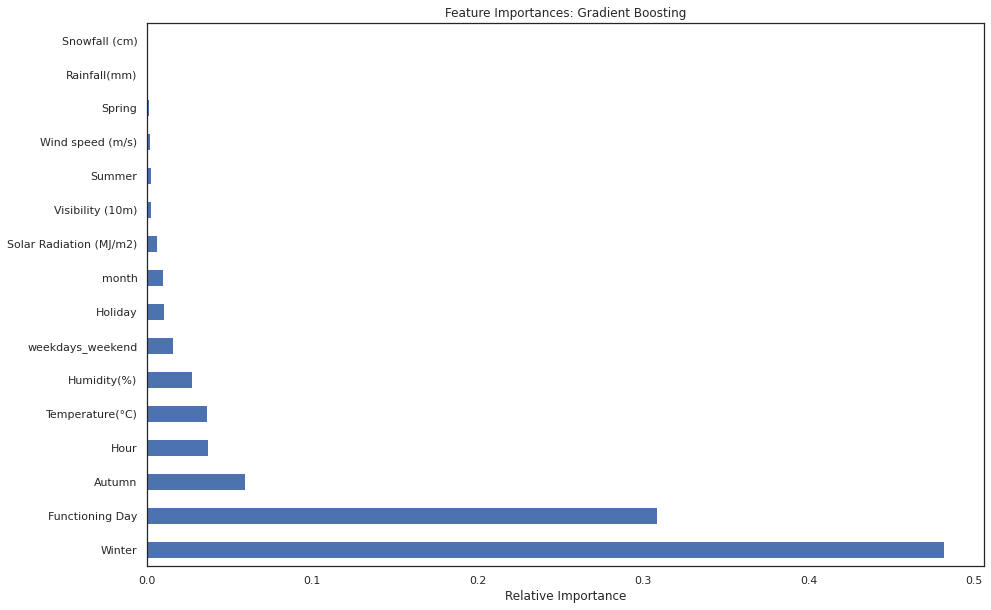

In [121]:
# Feature importances
rf_feature_imp = pd.Series(xgb_optimal_model.feature_importances_,index=X.columns)
plt.figure(figsize=(15,10))
plt.title('Feature Importances: Gradient Boosting')
plt.xlabel('Relative Importance')
rf_feature_imp.nlargest(20).plot(kind='barh')


*   The most crucial feature taken into account when utilising a XG boost to make predictions is winter.

#Result of all models

In [122]:
list_of_model = ['Linear regression','Lasso regression','Ridge regression','Elastic regression','Decision Tree','Random Forest','Gradient Boosting','Extreme Gradient Boosting']

In [123]:
result_list_MSE = [MSE_linear_test,MSE_lasso_test,MSE_ridge_test,MSE_elastic_test,MSE_dec_test,MSE_rf_test,MSE_gb_test,MSE_xgb_test]
result_list_RMSE = [RMSE_linear_test,RMSE_lasso_test,RMSE_ridge_test,RMSE_elastic_test,RMSE_dec_test,RMSE_rf_test,RMSE_gb_test,RMSE_xgb_test]
result_list_MAE = [MAE_linear_test,MAE_lasso_test,MAE_ridge_test,MAE_elastic_test,MAE_dec_test,MAE_rf_test,MAE_gb_test,MAE_xgb_test]
result_list_R2 = [R2_linear_test,R2_lasso_test,R2_ridge_test,R2_elastic_test,R2_dec_test,R2_rf_test,R2_gb_test,R2_xgb_test]
relust_list_adjusted_R2=[Adjusted_R2_linear_test,Adjusted_R2_lasso_test,Adjusted_R2_ridge_test,Adjusted_R2_elastic_test,Adjusted_R2_dec_test,Adjusted_R2_rf_test,Adjusted_R2_gb_test,Adjusted_R2_xgb_test]

In [124]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [125]:
#adding above lists to the empty dataframe
results_df['model_name'] = list_of_model
results_df['MSE_score'] = result_list_MSE
results_df['RMSE_score'] = result_list_RMSE#plot for training also
results_df['MAE_score'] = result_list_MAE
results_df['R2_score'] = result_list_R2
results_df['Adjusted_R2_score'] = relust_list_adjusted_R2

In [126]:
results_df.style.hide_index().background_gradient(cmap='RdYlBu_r').format()

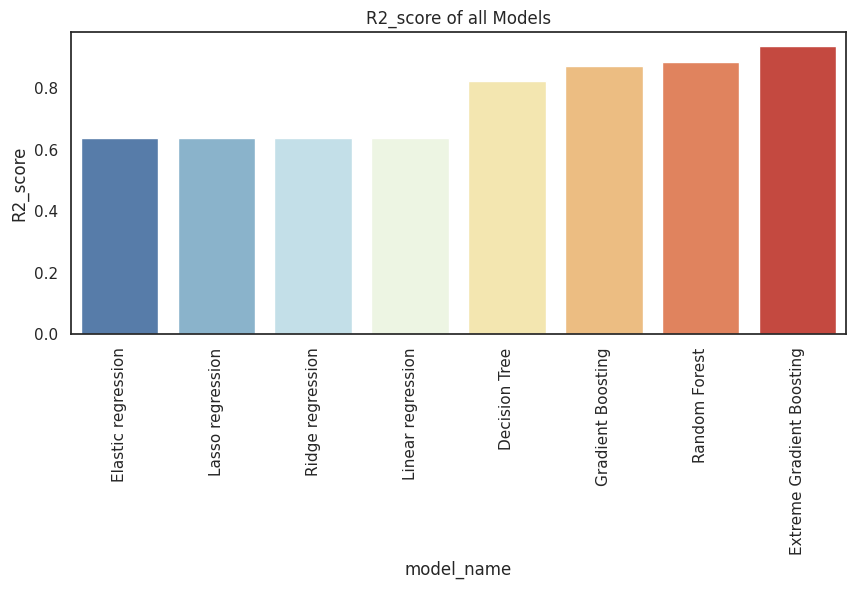

In [127]:
#creating bar plot to visualize the R2 of all the models
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='model_name',y='R2_score',data=results_df.sort_values('R2_score'),palette="RdYlBu_r").set(title='R2_score of all Models')
plt.xticks(rotation=90);

#Model Explainability:

Explainability in machine learning is the process of describing to a human why and how a machine learning model reached a decision. The capacity of the algorithm and its decision or output to be understood by a person is referred to as model explainability. Understanding the logic behind a system's decision requires analysing the outcomes and decisions made by machine learning models.

Techniques for model explainability:

LIME

SHAP

ELI-5

For model explainability in this case, we'll use SHAP. We'll be utilising the SHAP summary plot, one of the numerous SHAP approaches, which depicts the SHAP values as well as features/columns in order of their influence on the predictions.

In [128]:
#Installing the shap library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 25.7 MB/s eta 0:00:00


In [129]:
#Import shap
import shap

In [130]:
#Building a plotting function for the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

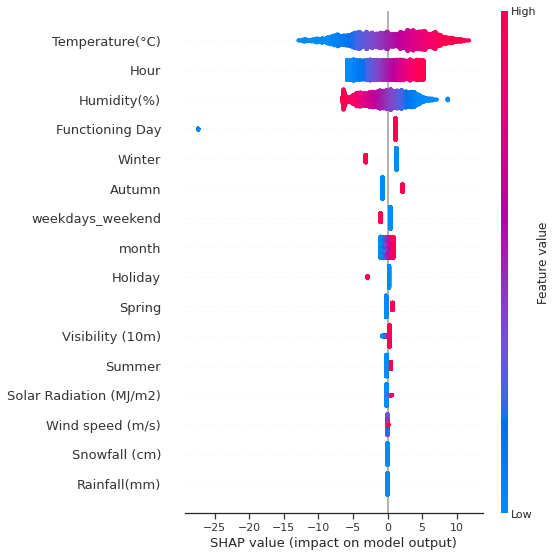

In [131]:
# For linear regression, plotting the shap summary plot
shap_summary(regressor)

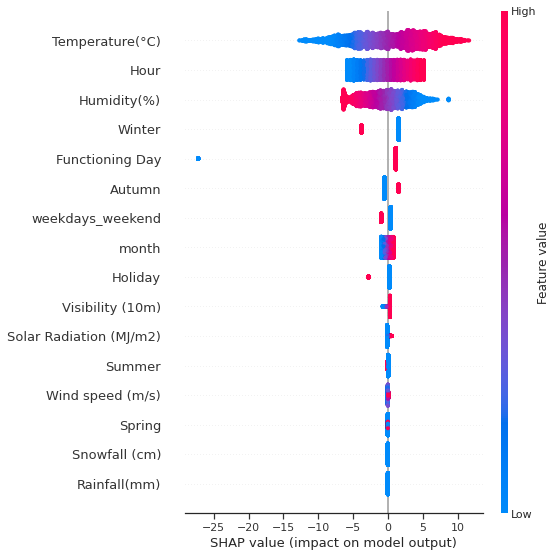

In [132]:
# For the Lasso regression, plotting the shap summary plot
shap_summary(lasso_model)

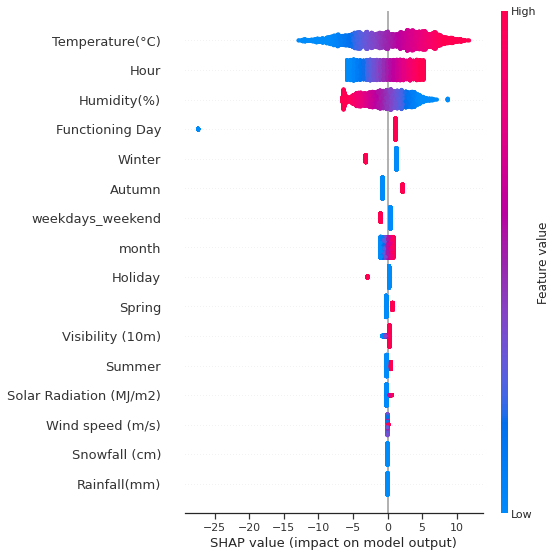

In [133]:
# For the Ridge regression, plotting the shap summary plot
shap_summary(ridge_model)

 98%|===================| 6463/6570 [00:56<00:00]       

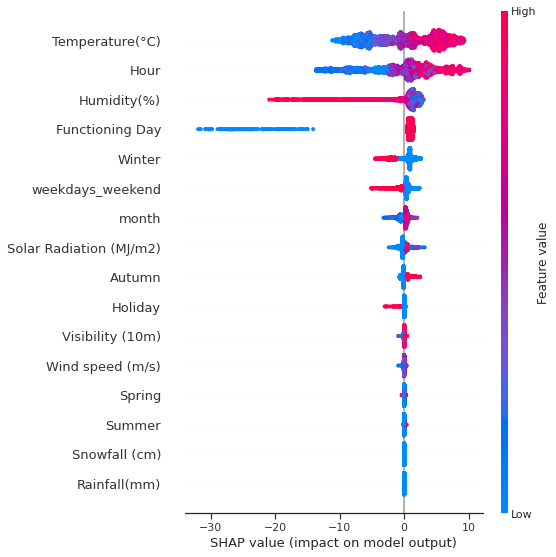

In [134]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=optimal_rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

The SHAP approach is one of these methods, which explains how each feature influences the model.

We observe that each model gives the features a different level of importance or impact power, and this determines how well the model predicts. Out of the four models, Random Forest performs the best because it gives nearly all of the features a significant impact power.

#Summary and Conclusion:

In the morning and evening, many people rent bikes. The 4th and 18th hours are when the most bikes are leased when the weather is warm (20° to 28°C), the wind speed is between 2 and 3 m/s, and there is adequate visibility. More people hired bikes in the sixth months and most bikes are rented during non-holiday times.

With a r2 score of 93%, 88% , Extreme Gradient Boosting and Random Forest is the model that performs the best.

Therefore, there will be high supply and demand for bikes when there is mild sunlight, low humidity, no wind, and dry roads. People choose to hire and ride bikes.There will be a lot of demand and supply on both sides when the weather is pleasant.